In [1]:
from Modulos.modulos_auxiliares import *

# Importando a imagem da pasta Amostras

In [2]:
#importando uma imagem
nome = 'corte_teste.tiff'##input("nome da imagem a ser importada:")
nome = "../Amostras/2D/" + nome
img = plt.imread(nome)

#remove after
#plt.figure(figsize = [15,15])
#plt.imshow(img, "gray")

# Segmentando a imagem

In [3]:
img_suave = seg.vessel_segmentation(im.Image(img), 1)
img_suave = img_suave.data

#remove after
#plt.figure(figsize = [10,10])
#plt.imshow(img_suave, "gray")

# Tratando ruido e verificando

In [4]:
noise_aplication = [0.00, 0.05, 0.1, 0.15, 0.2, 0.25]
img_noise = []
for noise in noise_aplication:
    #appling noise and treatment
    img_filtered = random_noise(img_suave, noise)
    
    #remove small connected components    
    img_filtered = 1 - util.remove_small_comp(1 - img_filtered, 5)
    img_filtered = util.remove_small_comp(img_filtered, 100)
    img_noise.append(img_filtered)
    

#print(np.sum(img_noise[1] == 0))
#mostra_img(img_noise)

# Esqueletizacao da biblioteca skimage

In [5]:
skeleton_skimage = []
iou_skimage = []
tpr_skimage = []
ppv_skimage = []

#iteractive function to calculate IOU operation
for noise in img_noise:
    skeleton_skimage.append(skimage.morphology.skeletonize(noise))
    
    iou, tpr, ppv = confusion_matrix(skeleton_skimage[0], skeleton_skimage[-1])
    iou_skimage.append(iou)
    tpr_skimage.append(tpr)
    ppv_skimage.append(ppv)
    
#display image list
#mostra_img(skeleton_skimage)

# Medial axis skeleton

In [6]:
skeleton_MA = []
iou_MA = []
tpr_MA = []
ppv_MA = []

#iteractive function to calculate IOU operation
for noise in img_noise:
    skeleton_MA.append(skimage.morphology.medial_axis(noise))
    
    iou, tpr, ppv = confusion_matrix(skeleton_MA[0], skeleton_MA[-1])
    iou_MA.append(iou)
    tpr_MA.append(tpr)
    ppv_MA.append(ppv)

    
#mostra_img(skeleton_MA)

# Esquletizacao Cesar Comin

In [7]:
skeleton_CHC = []
iou_CHC = []
tpr_CHC = []
ppv_CHC = []

#iteractive function to calculate IOU operation
for noise in img_noise:
    aux = skeleton.skeletonize(im.Image(noise))
    skeleton_CHC.append(aux.data) 
    
    iou, tpr, ppv = confusion_matrix(skeleton_CHC[0], skeleton_CHC[-1])
    iou_CHC.append(iou)
    tpr_CHC.append(tpr)
    ppv_CHC.append(ppv)
    
#display image list
#mostra_img(skeleton_CHC)

# Mostrando o grafico das operações IOU, TPR, PPV

6 6 6 6 6 6 6
[1.0, 0.9959321082900827, 0.9830139964669112, 0.9667016255899319, 0.9516349620788263, 0.9176988077323764]


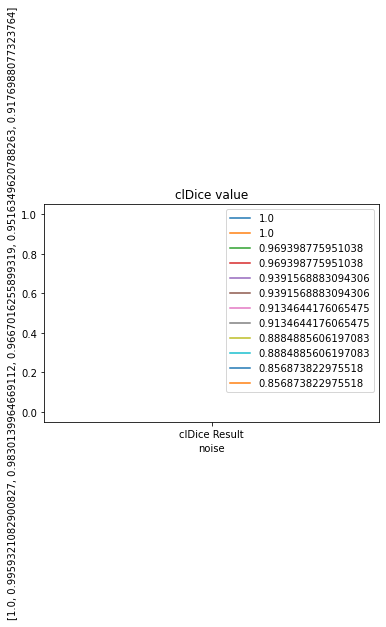

In [8]:
result_cldice_skimage = []
result_cldice_MA = []
result_cldice_CHC = []

#isso se considera verdade enquanto o len de skimage, CHC e MA são iguais
for Count in range (len (skeleton_skimage)):
    result_cldice_skimage.append( clDice_adaptative_2D(img_noise[0], img_noise[Count], skeleton_skimage[0], skeleton_skimage[Count]) )
    result_cldice_MA.append( clDice_adaptative_2D(img_noise[0], img_noise[Count], skeleton_MA[0], skeleton_MA[Count]) )
    result_cldice_CHC.append( clDice_adaptative_2D(img_noise[0], img_noise[Count], skeleton_CHC[0], skeleton_CHC[Count]) )

    
print(len(result_cldice_skimage), len(result_cldice_MA), len(result_cldice_CHC), len(skeleton_MA), len(skeleton_CHC), len(skeleton_skimage), len(noise_aplication))
print(result_cldice_CHC)   
plot_graph(result_cldice_skimage, result_cldice_MA, result_cldice_CHC, "clDice value", "clDice Result", noise_aplication)

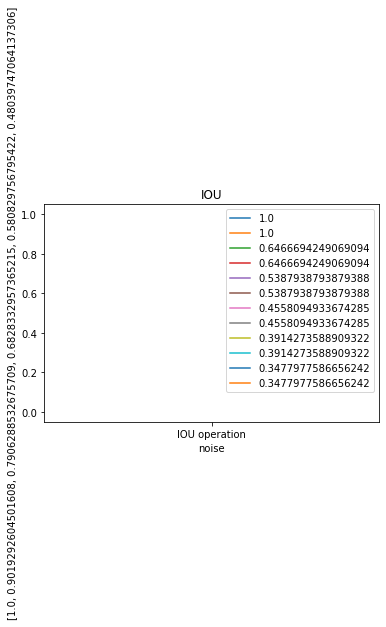

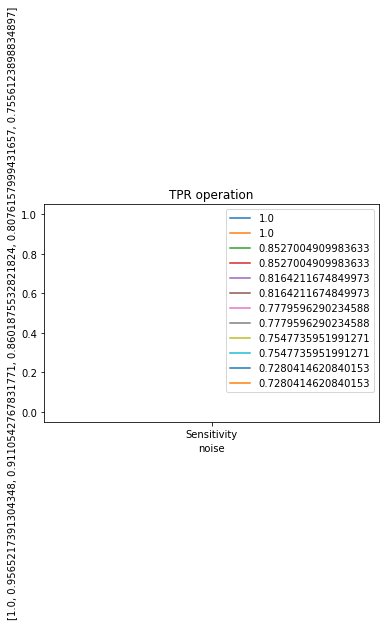

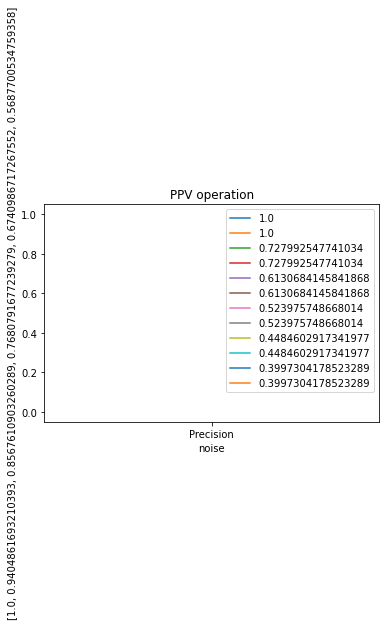

In [9]:
plot_graph(iou_skimage, iou_MA, iou_CHC, "IOU", "IOU operation", noise_aplication)
plot_graph(tpr_skimage, tpr_MA, tpr_CHC, "TPR operation", "Sensitivity", noise_aplication)
plot_graph(ppv_skimage, ppv_MA, ppv_CHC, "PPV operation", "Precision", noise_aplication)

6


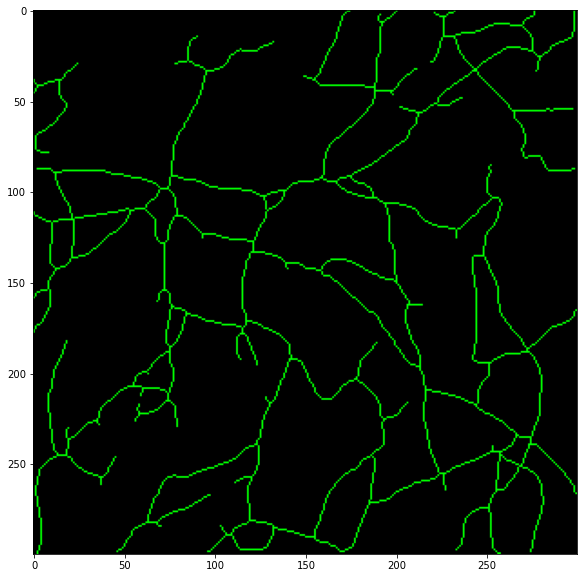

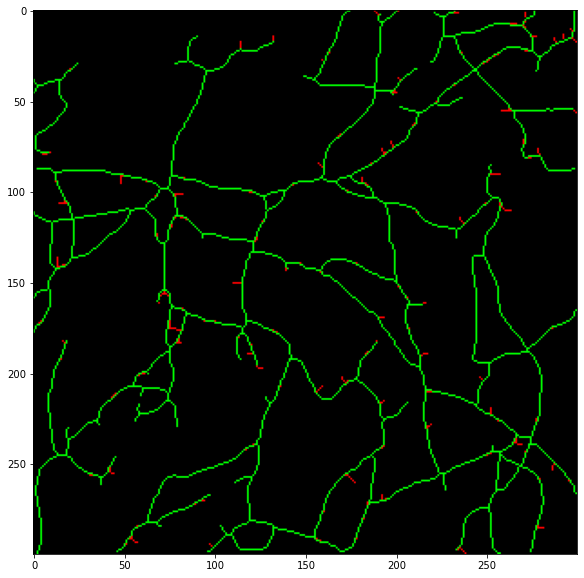

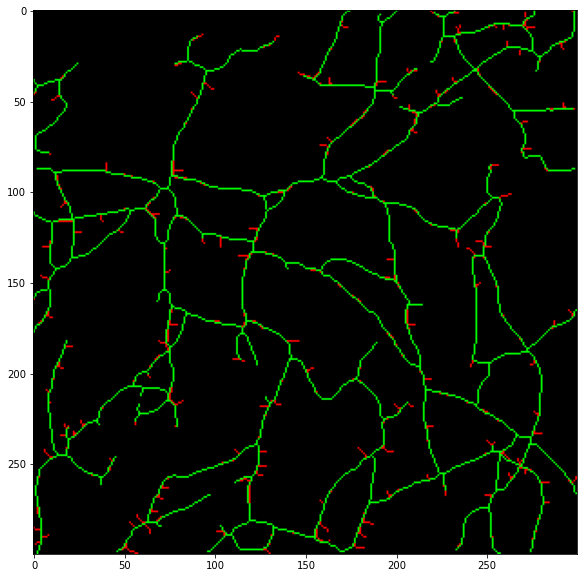

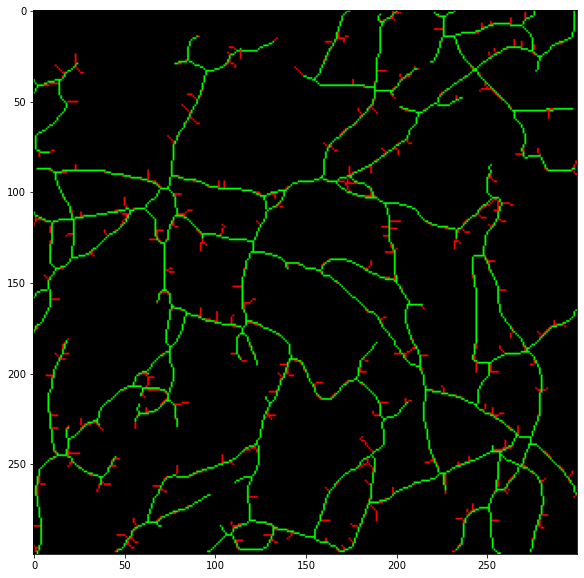

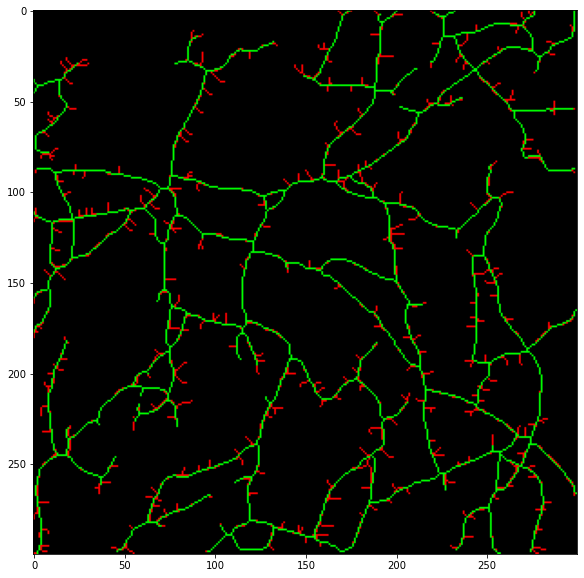

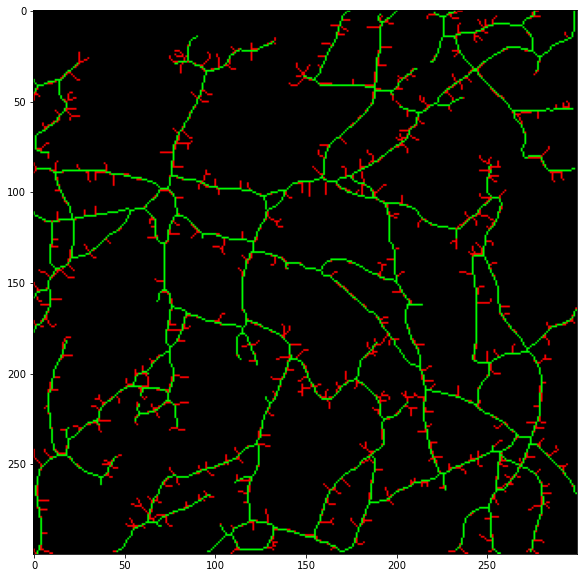

In [10]:
# verde é o esqueleto base e vermelho é o esqueleto com ruido 
comparacao_skimage = []

for Count in range(len(skeleton_skimage) ):
    comparacao_skimage.append(merge_image(skeleton_skimage[Count], skeleton_skimage[0]) )
    
print(len(comparacao_skimage))
mostra_img(comparacao_skimage)

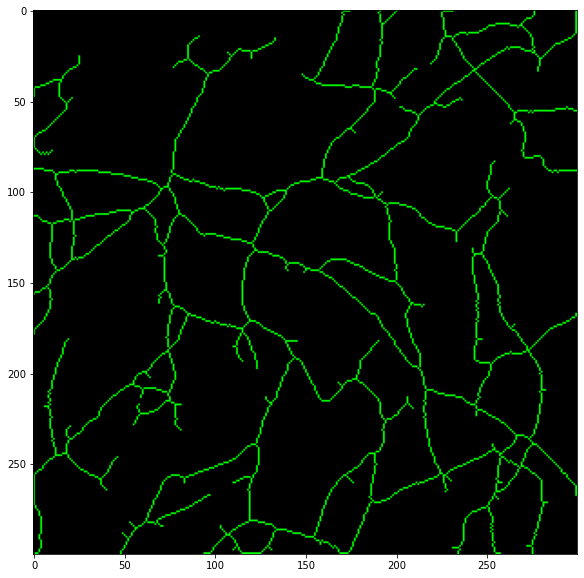

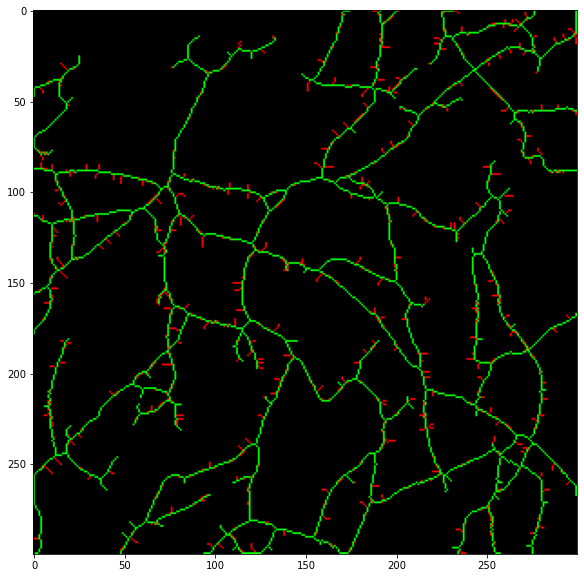

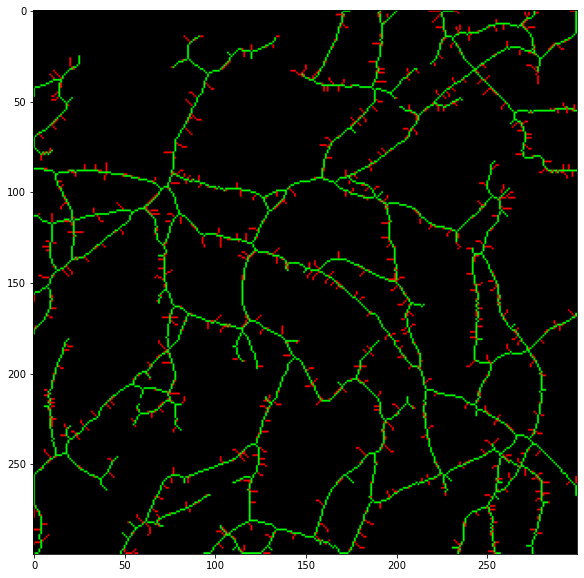

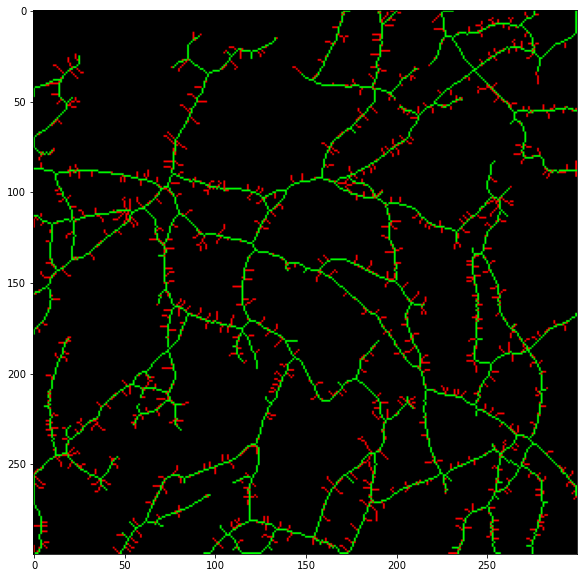

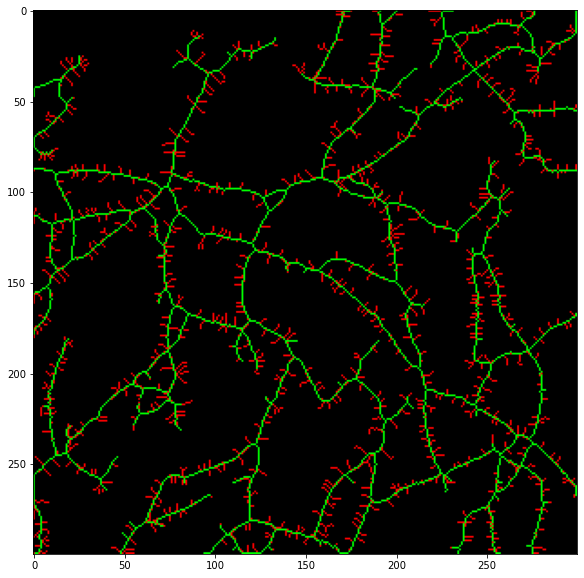

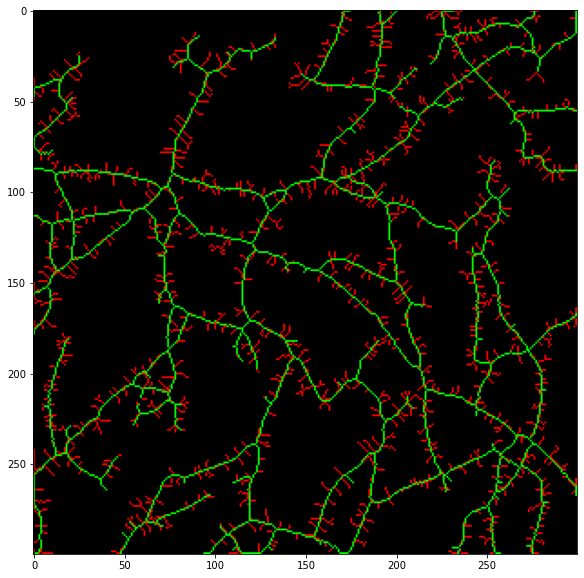

In [11]:
# verde é o esqueleto base e vermelho é o esqueleto com ruido
comparacao_MA = []

for Count in range(len(skeleton_MA) ):
    comparacao_MA.append(merge_image(skeleton_MA[Count], skeleton_MA[0]) )
    
mostra_img(comparacao_MA)

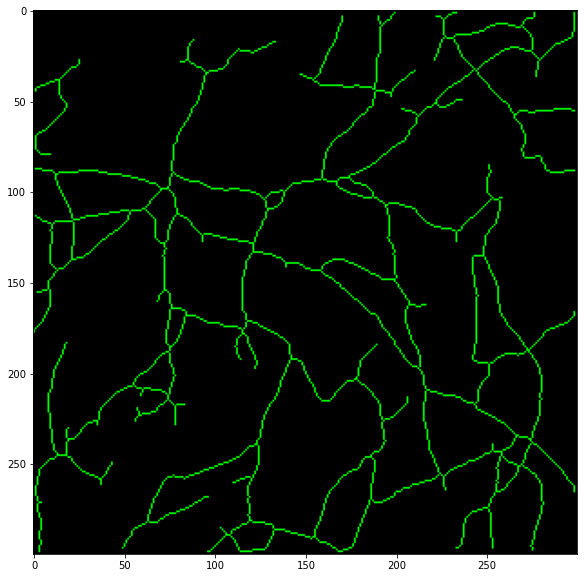

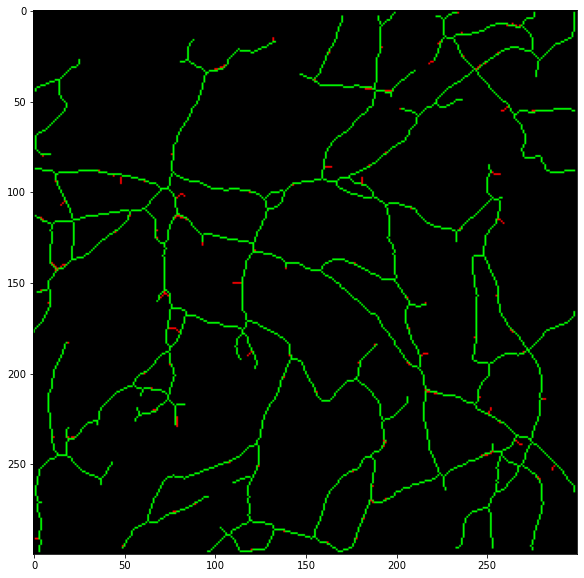

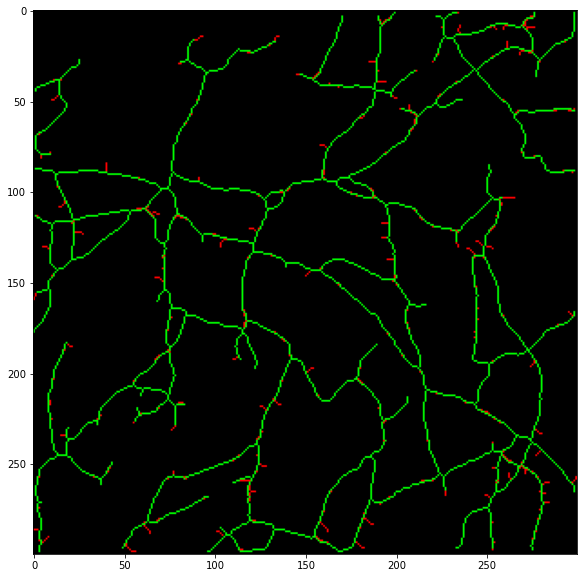

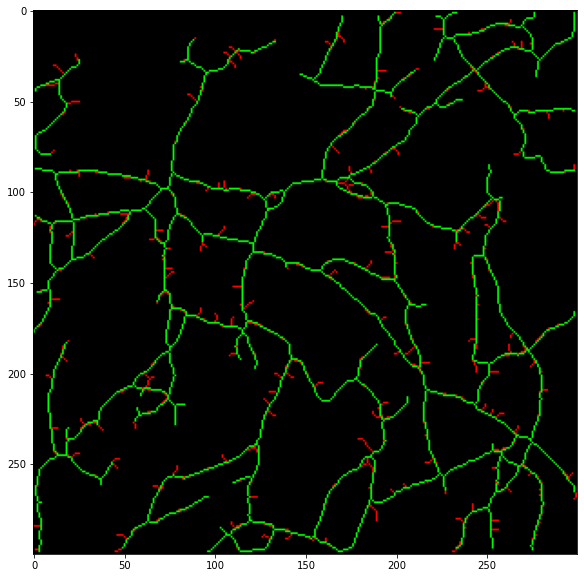

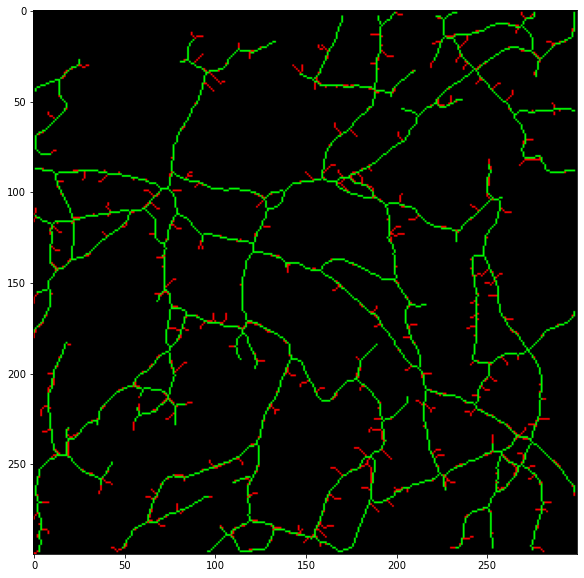

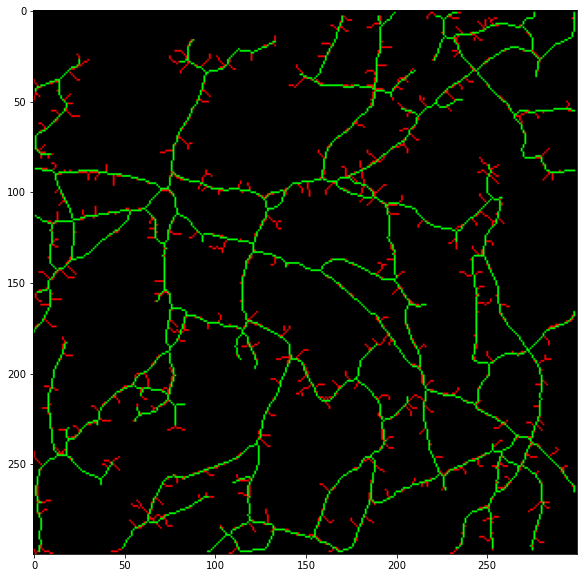

In [12]:
# verde é o esqueleto base e vermelho é o esqueleto com ruido
comparacao_CHC = []

for Count in range(len(skeleton_CHC) ):
    comparacao_CHC.append(merge_image(skeleton_CHC[Count], skeleton_CHC[0]) )
    
mostra_img(comparacao_CHC)

# teste do grafo

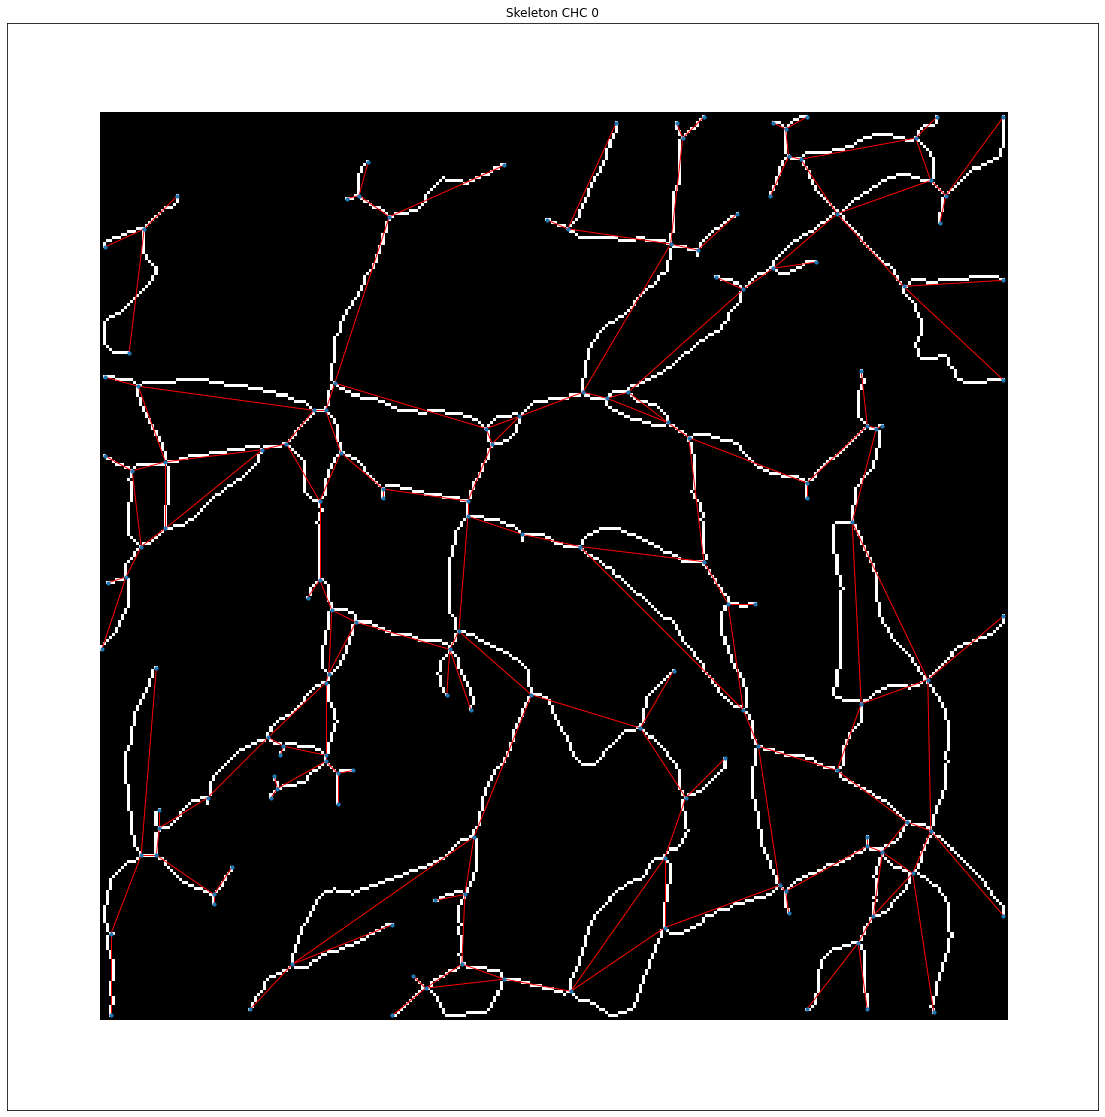

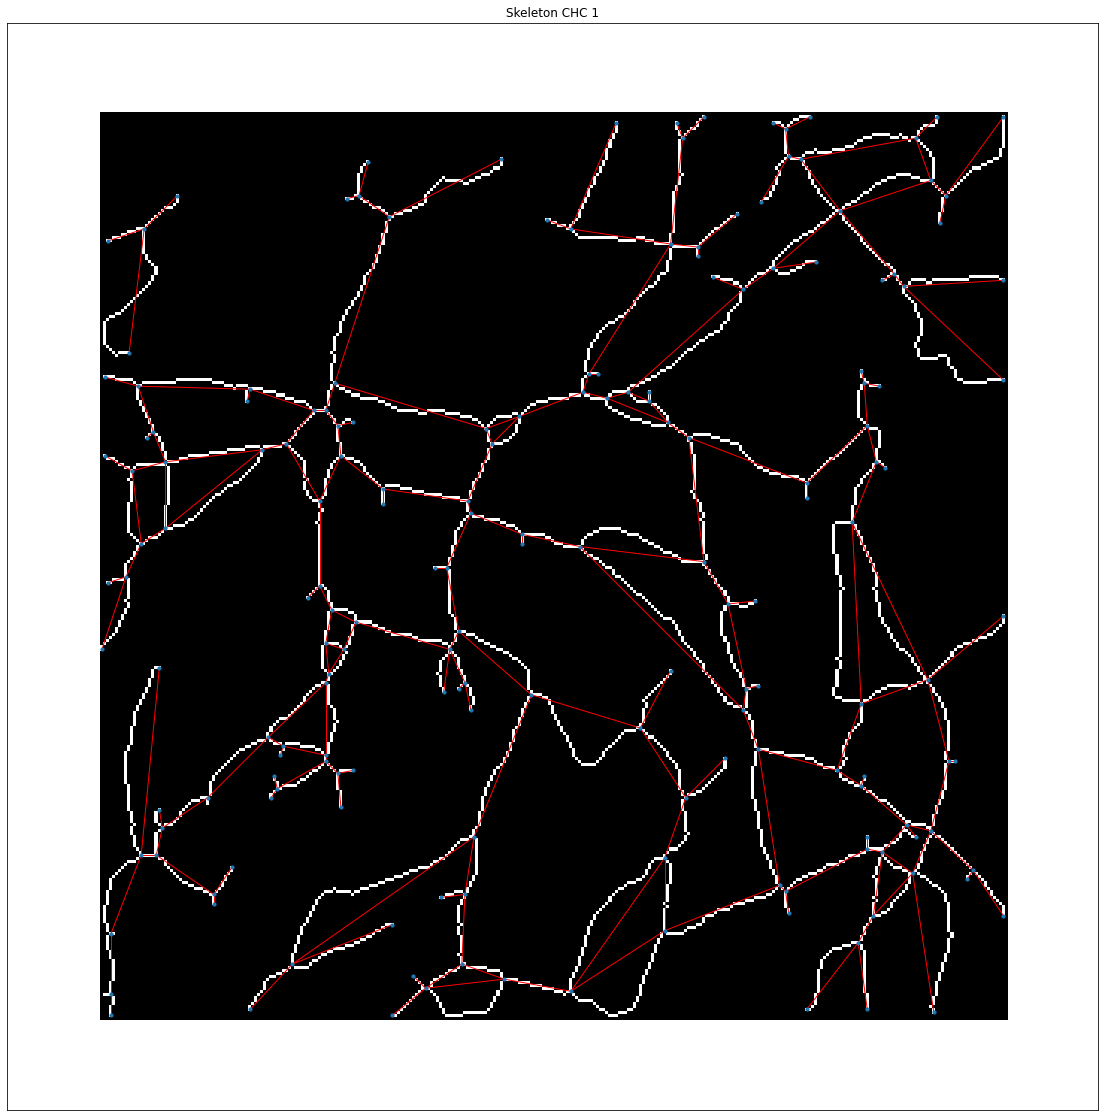

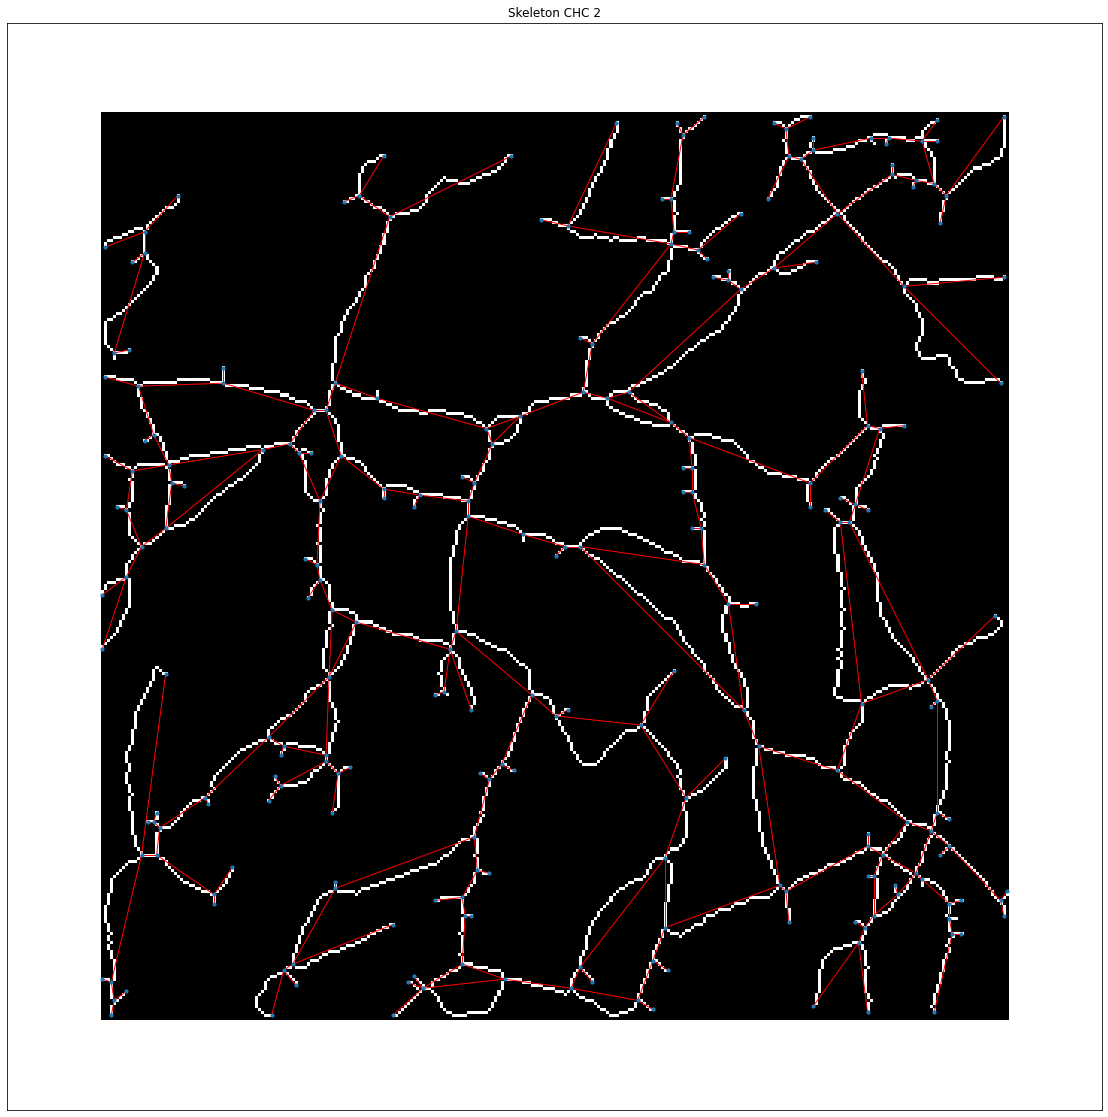

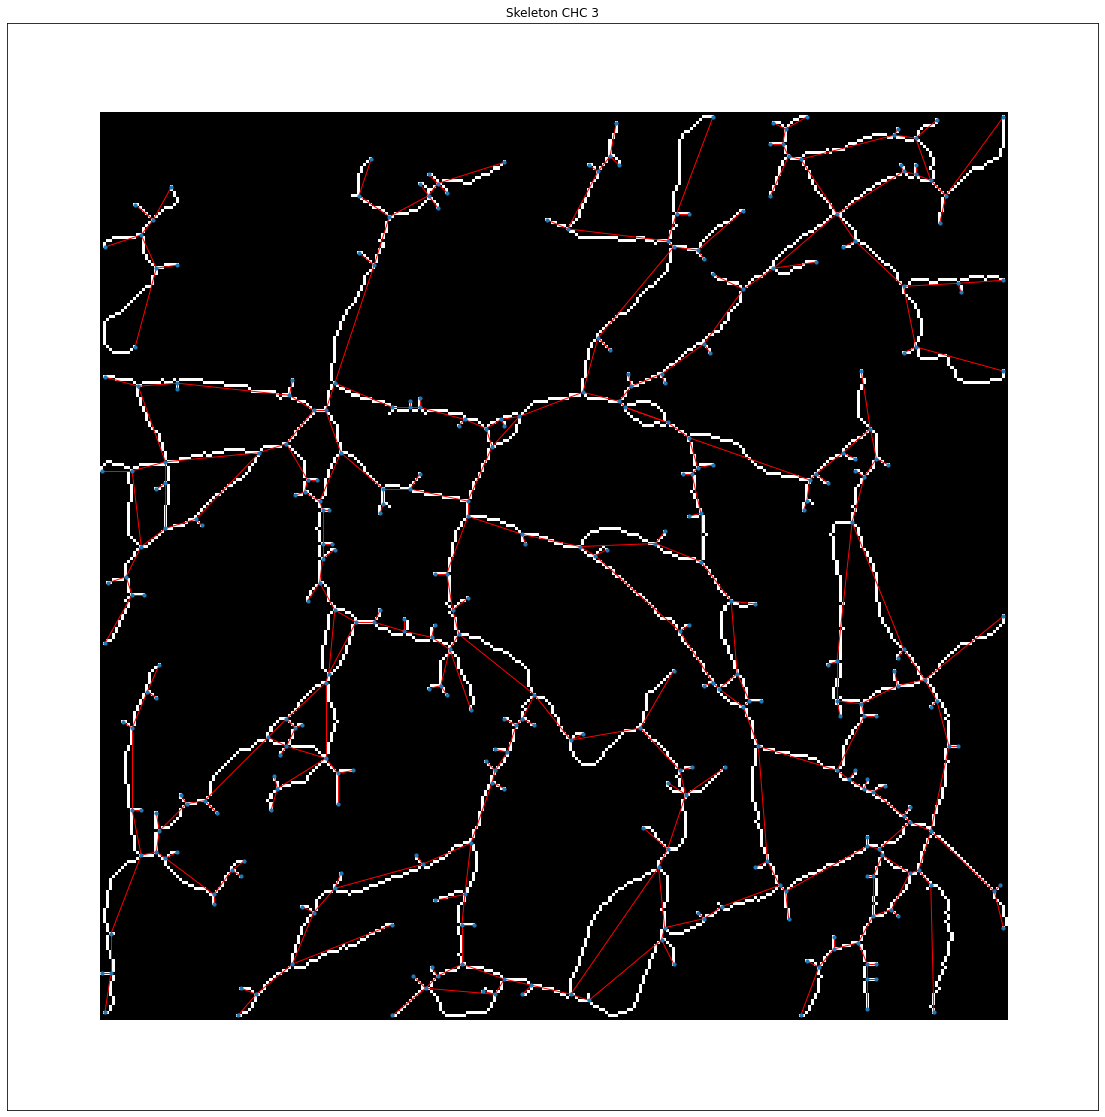

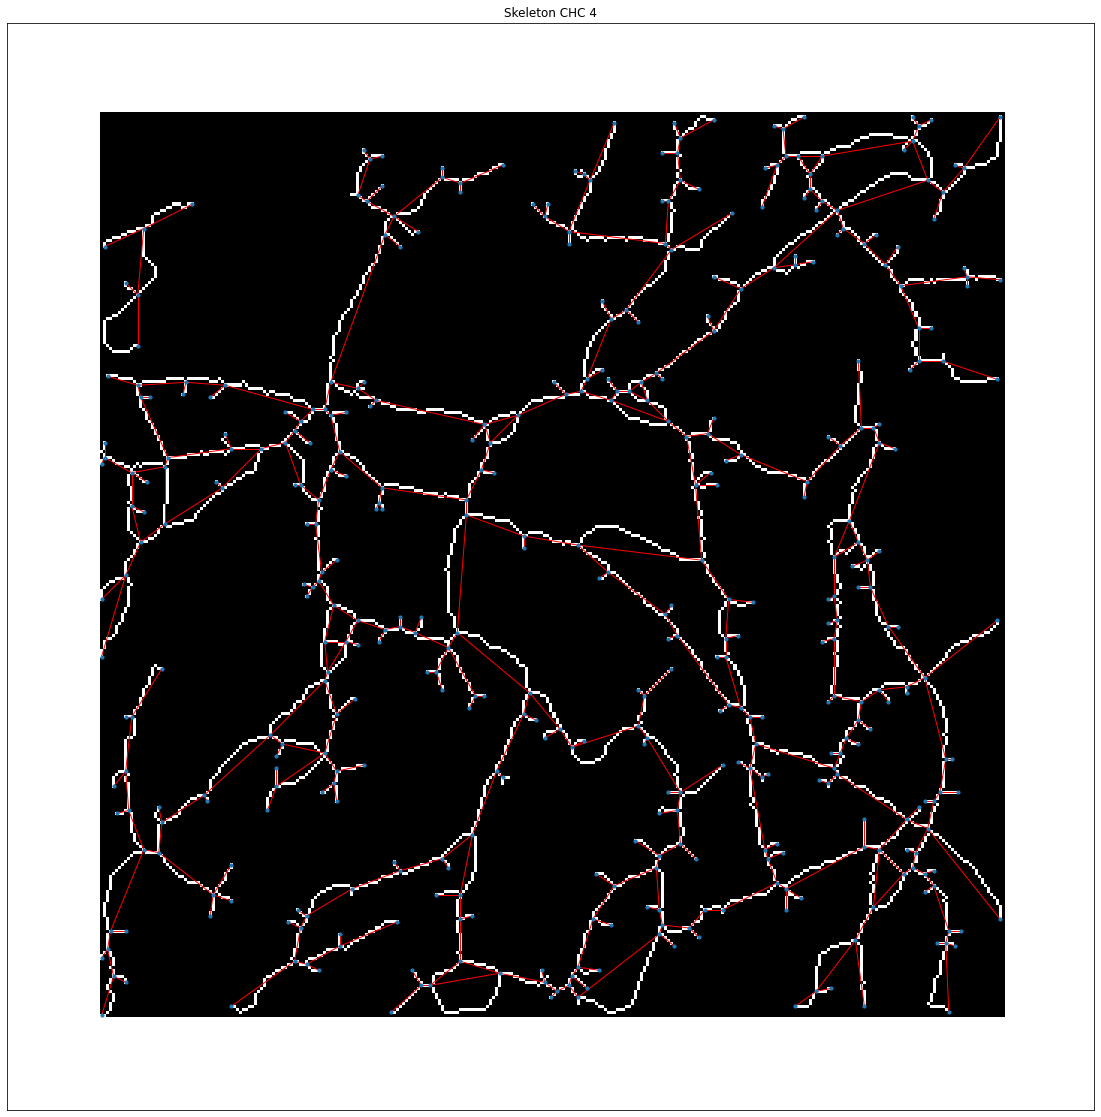

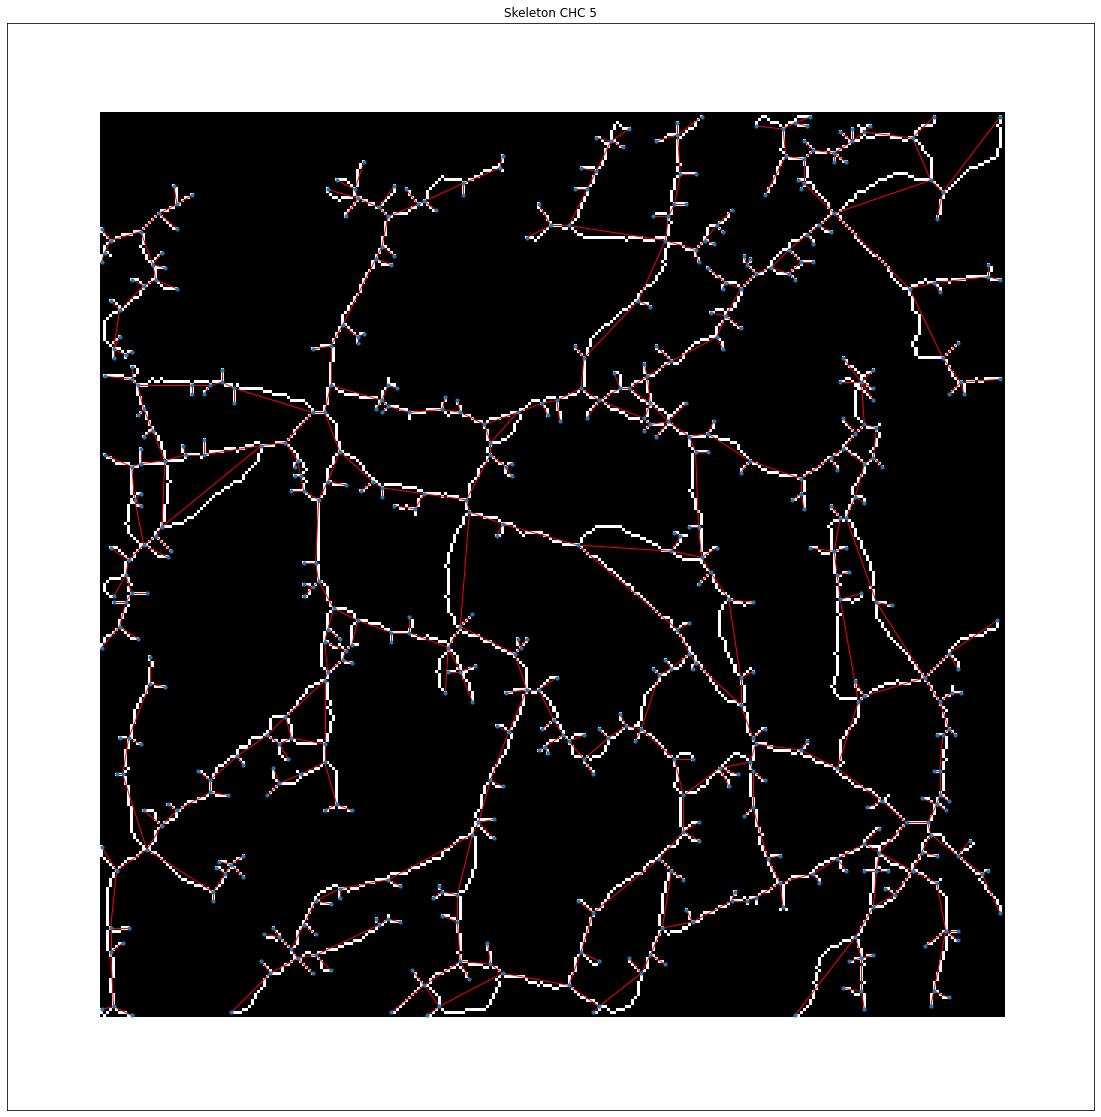

In [13]:
# Gerando o grafo do esqueleto
graph_CHC = generate_plot_graph(skeleton_CHC, "Skeleton CHC")

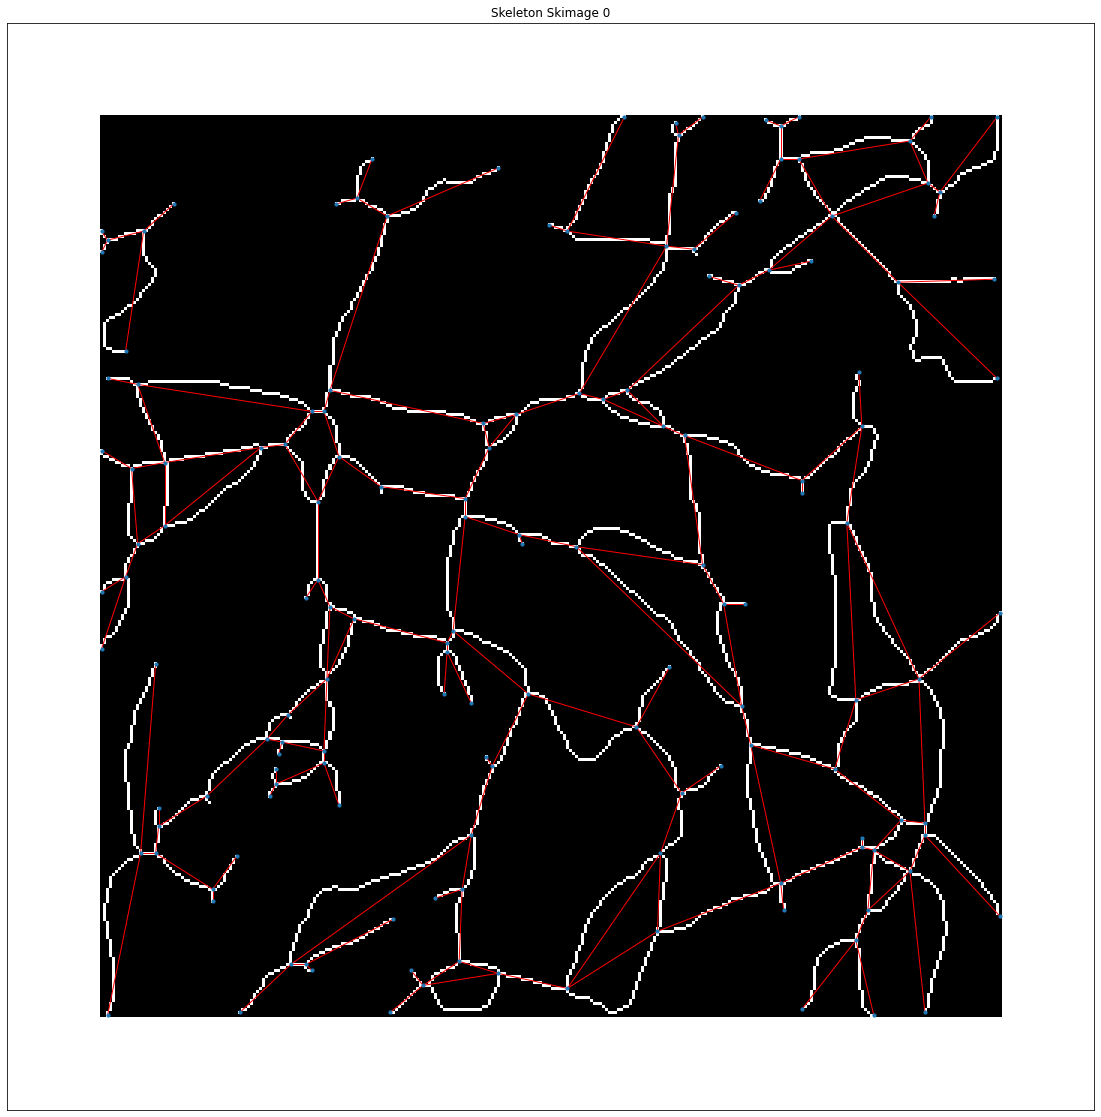

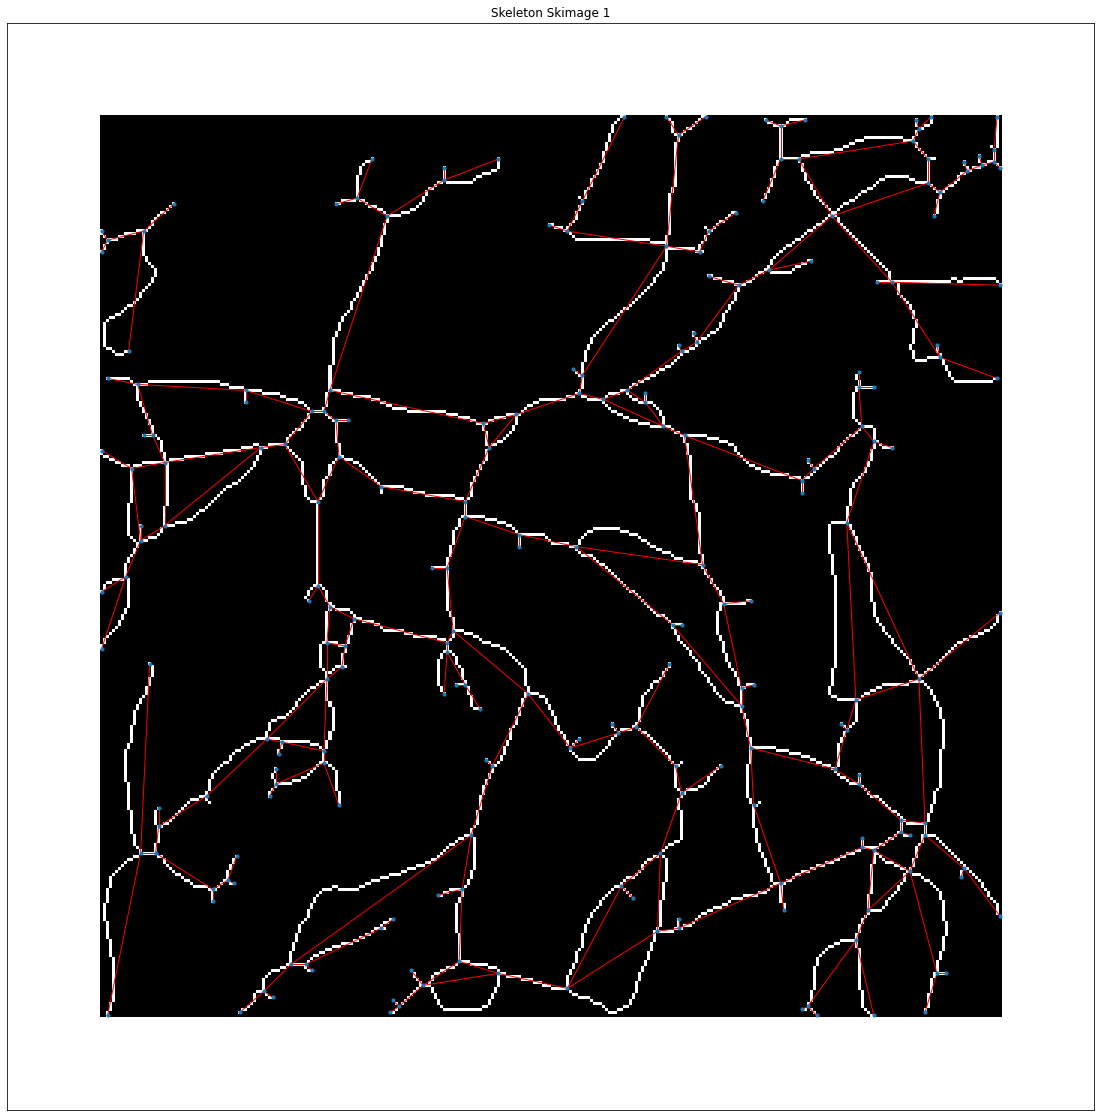

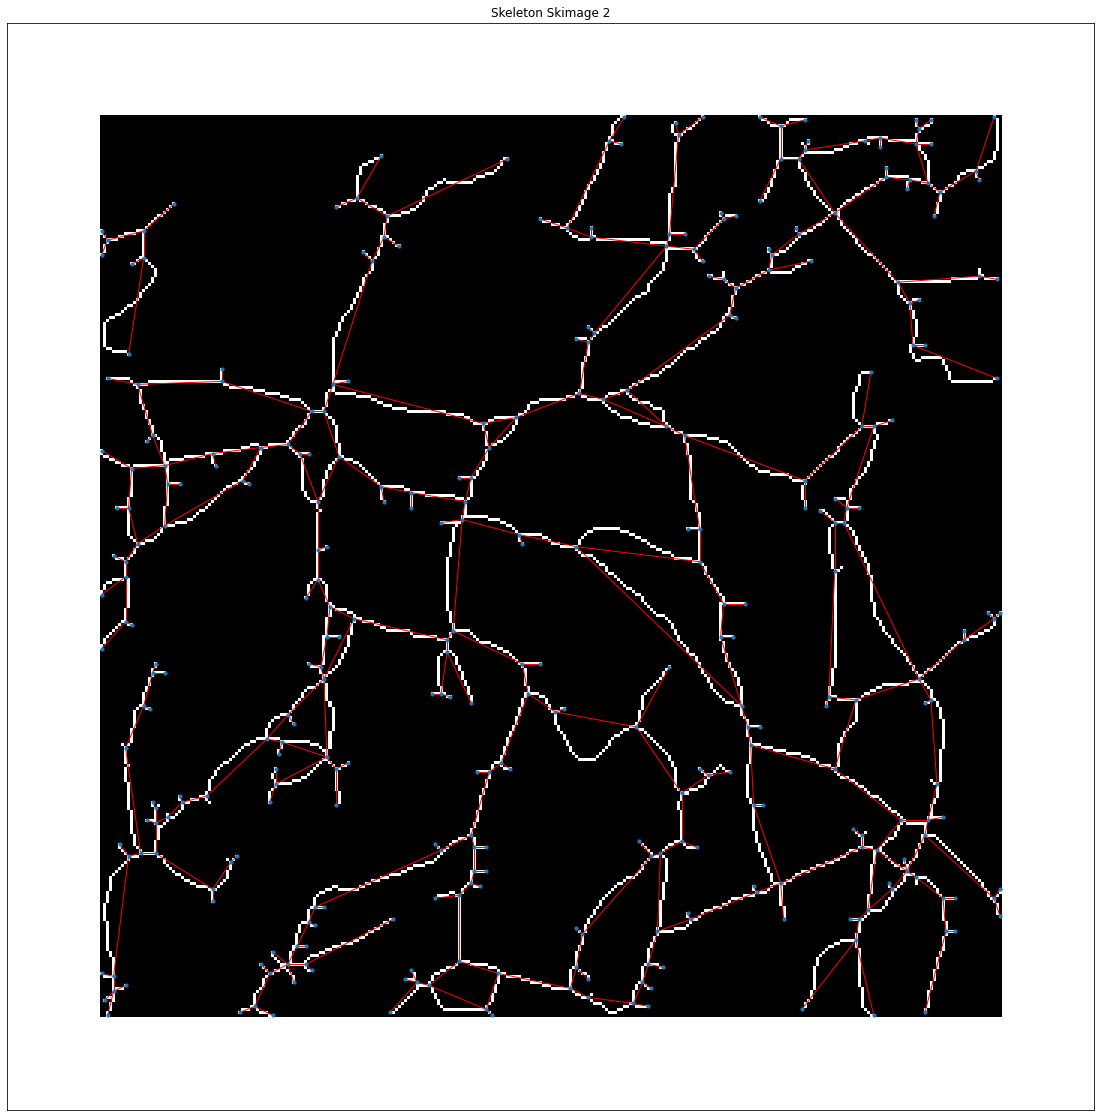

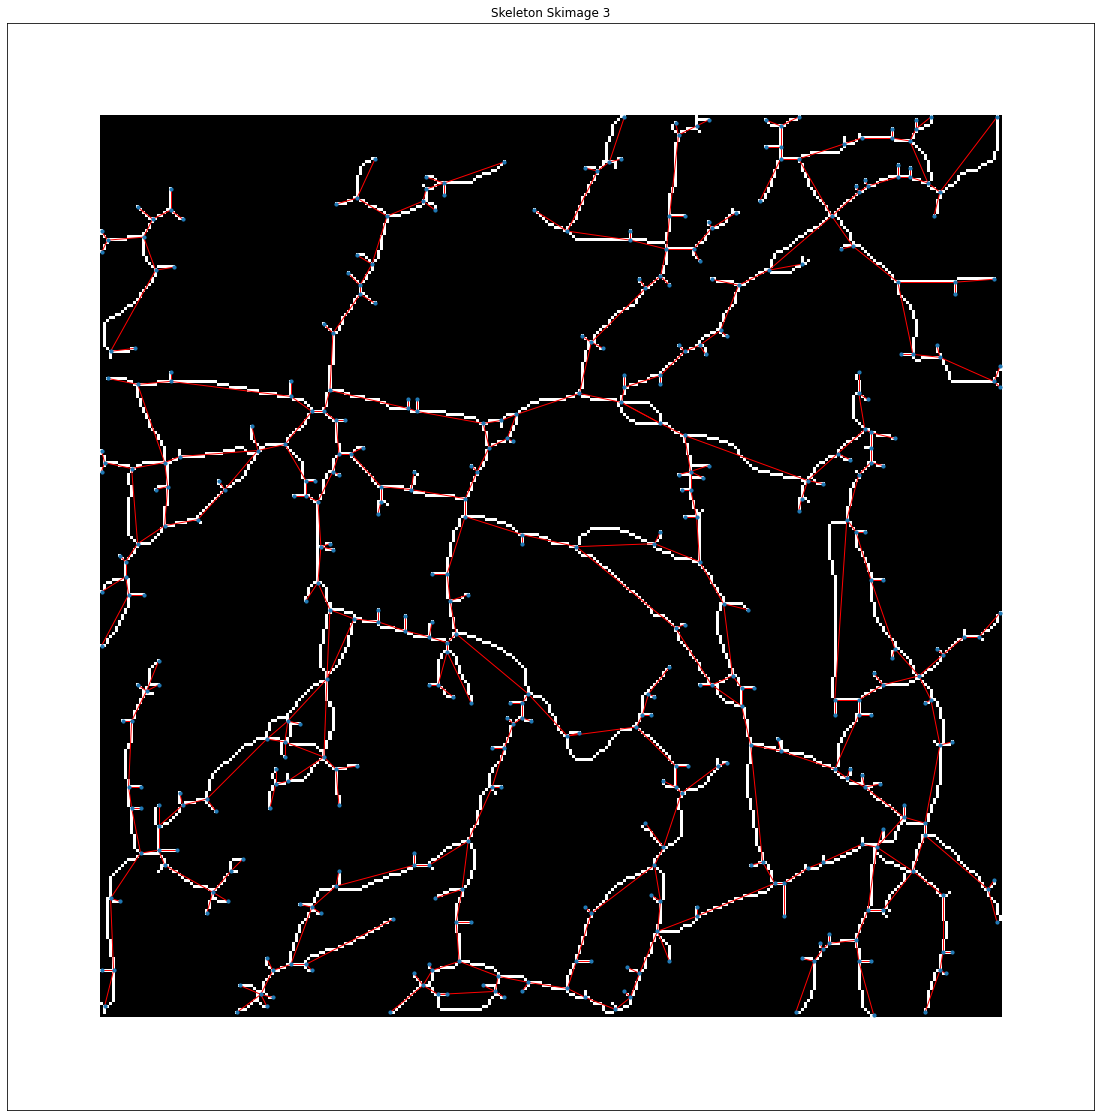

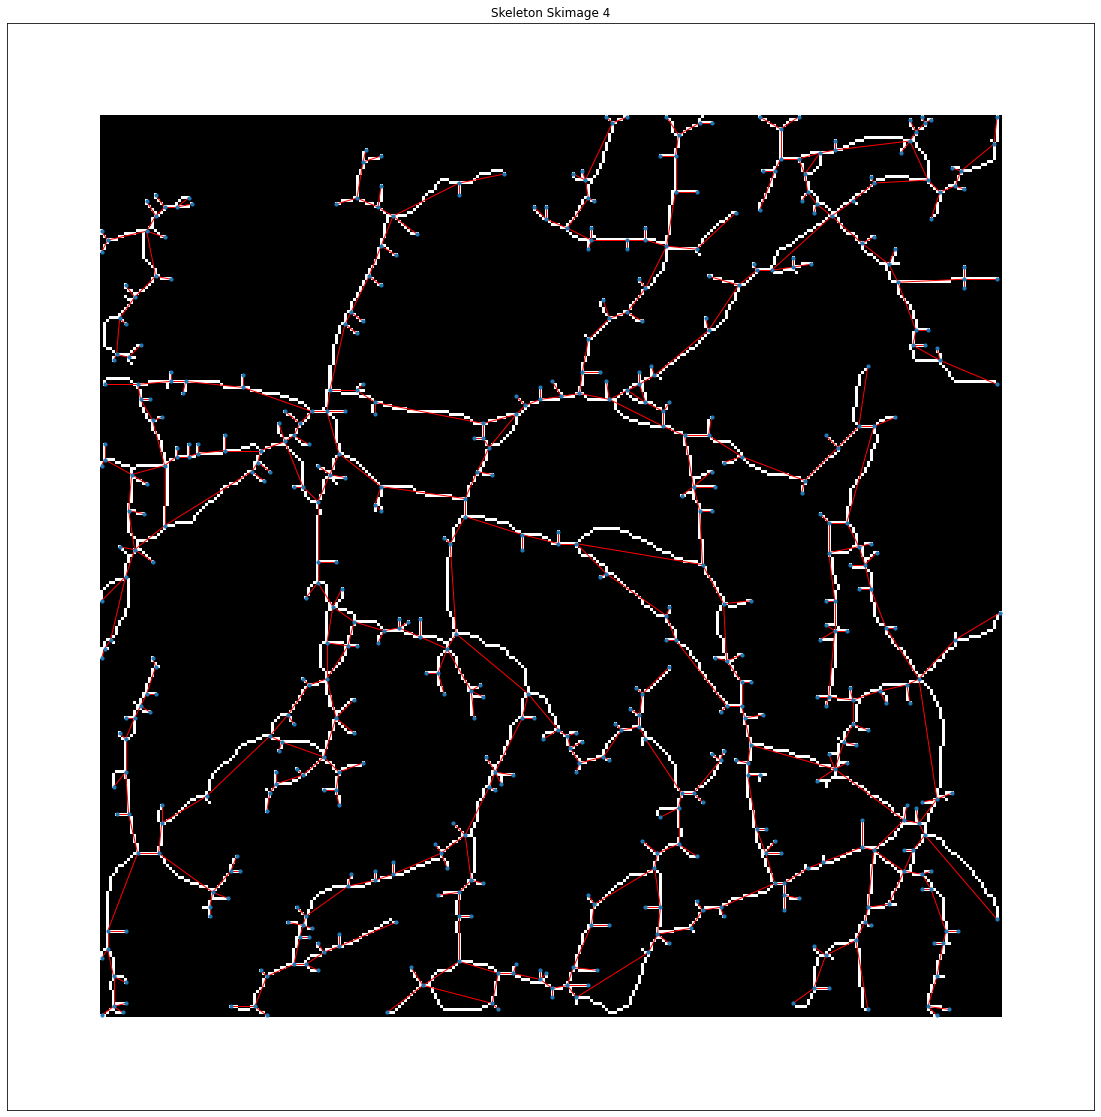

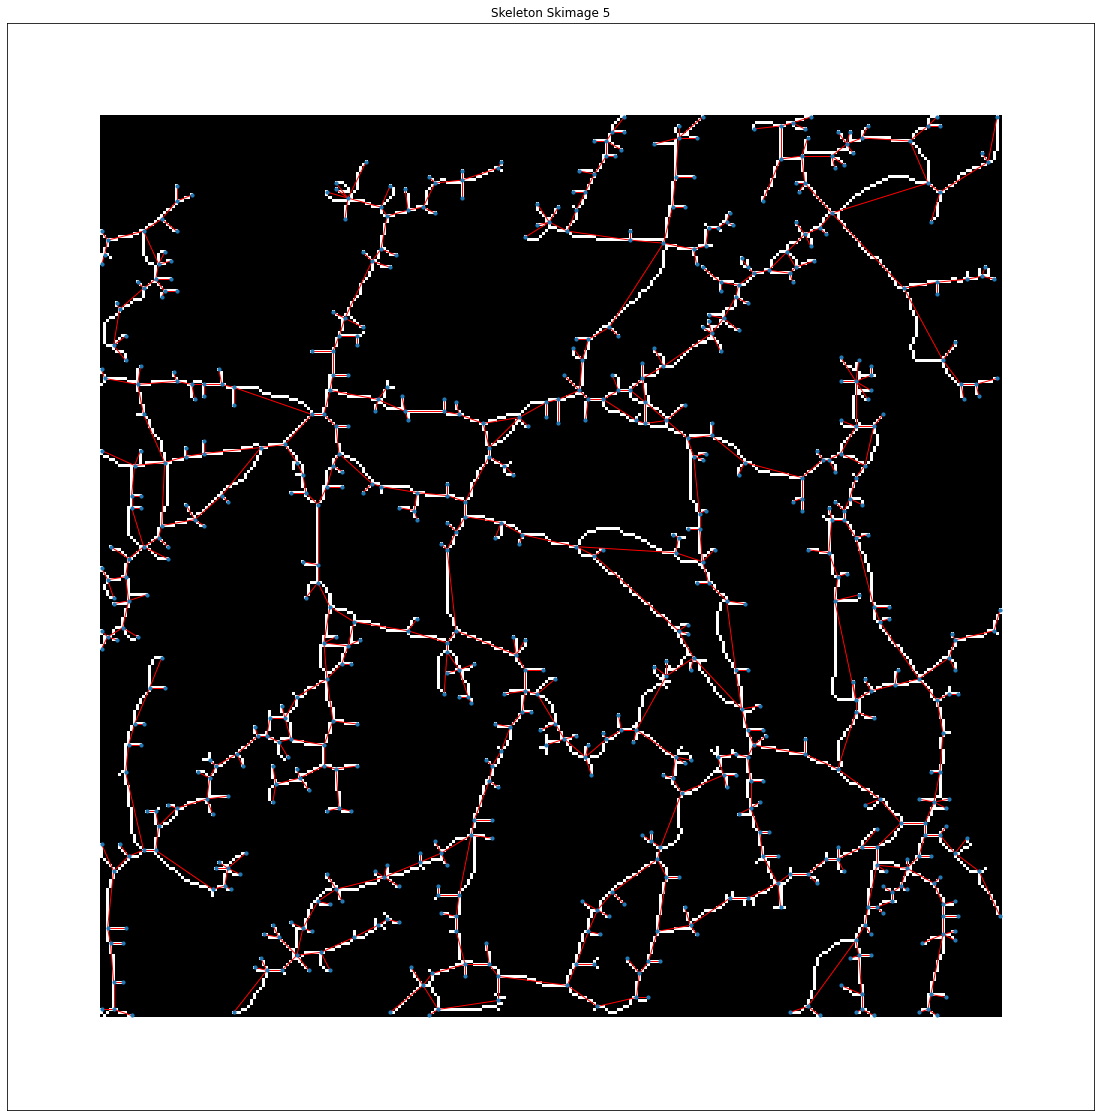

In [14]:
graph_skimage = generate_plot_graph(skeleton_skimage, "Skeleton Skimage")

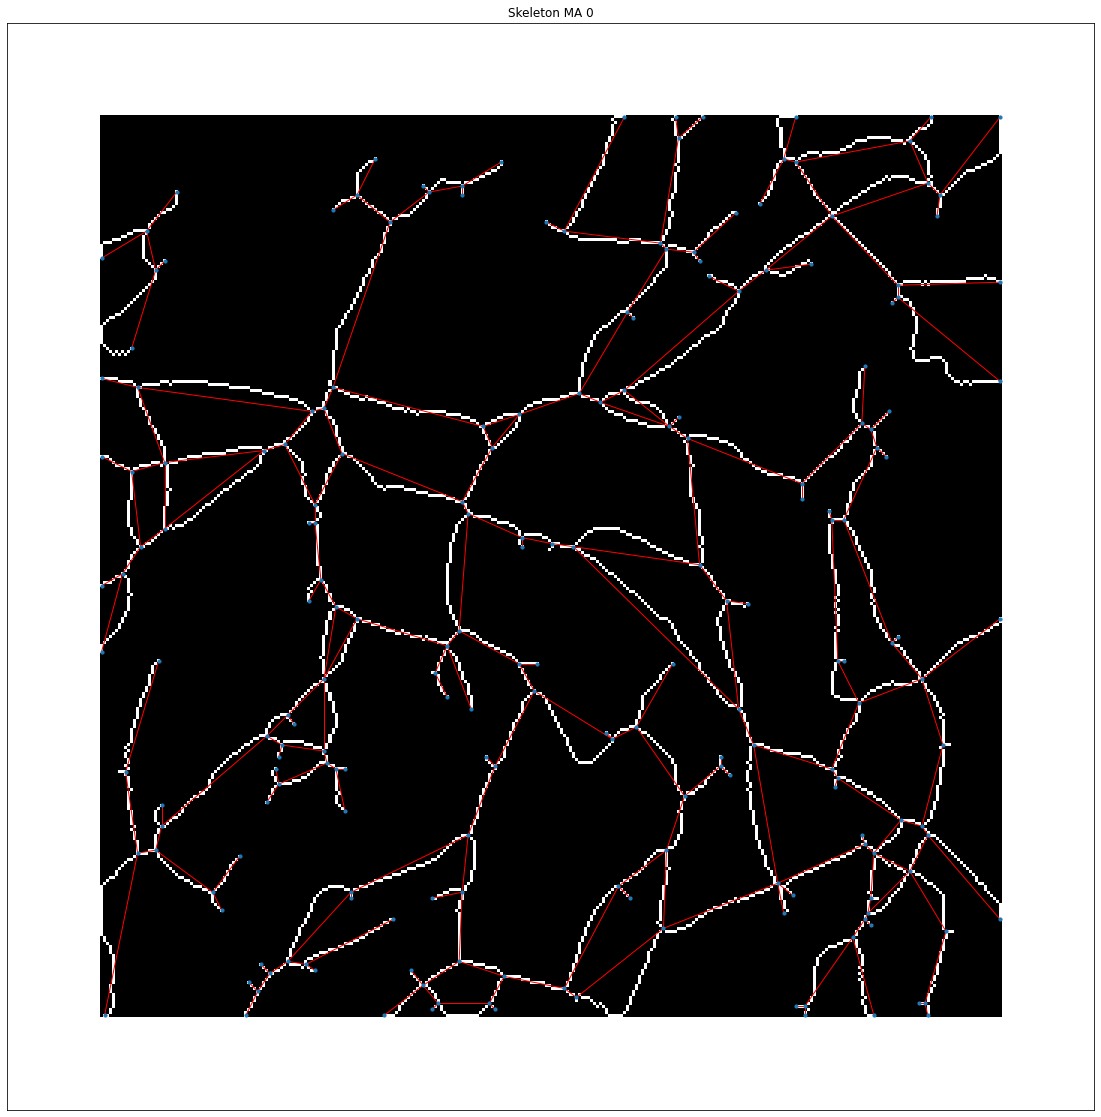

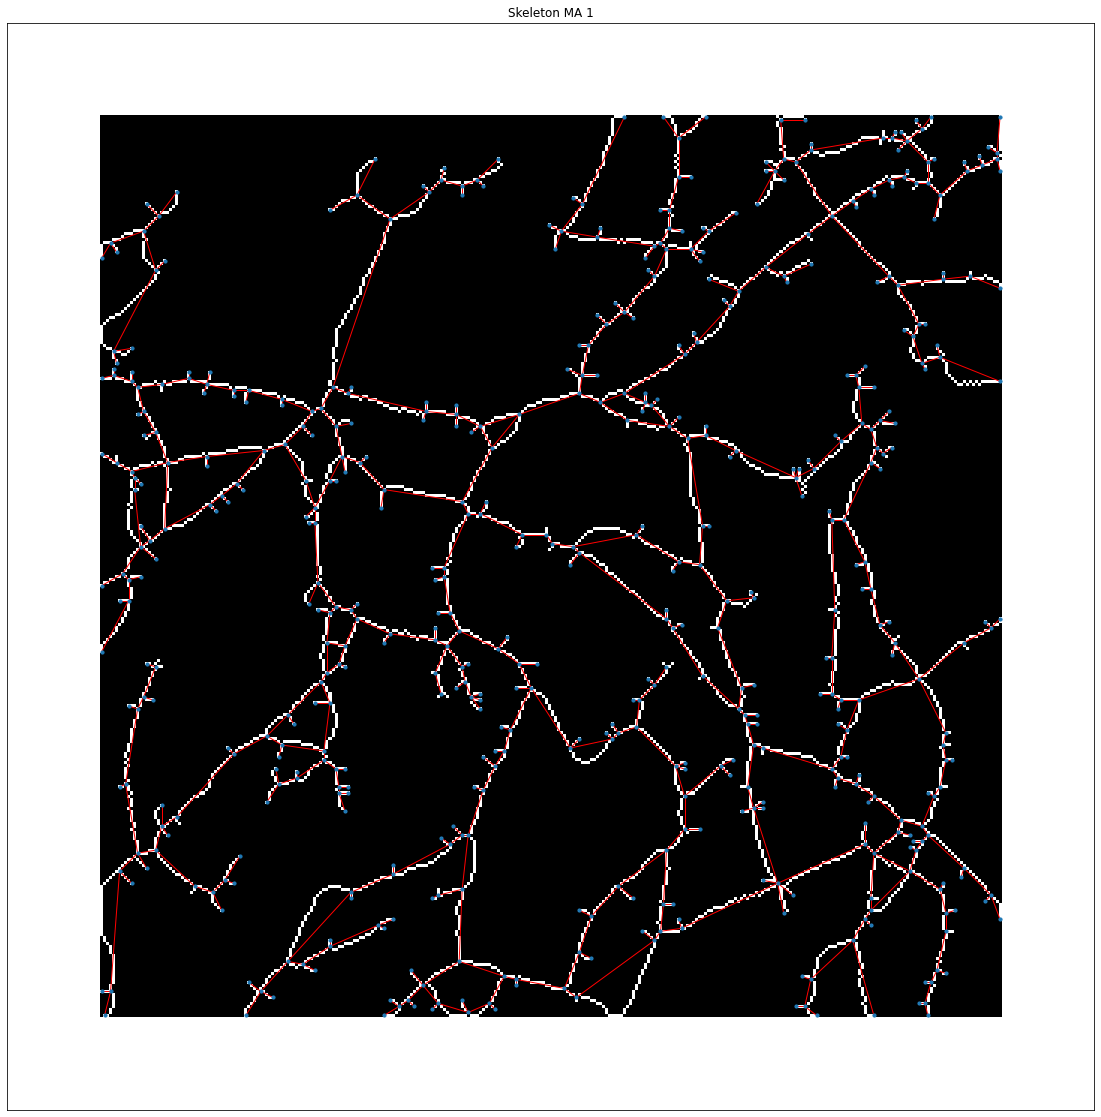

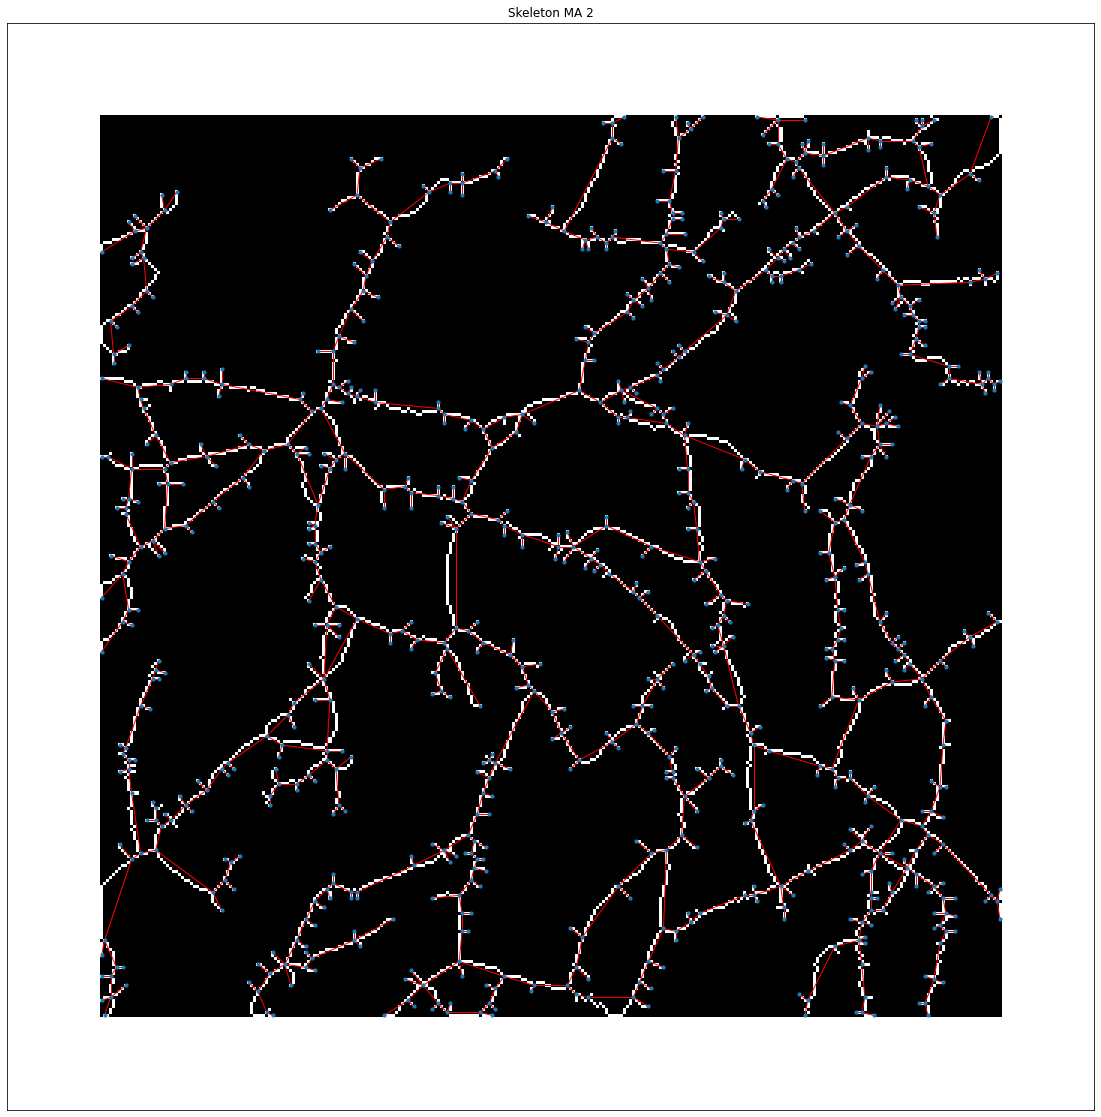

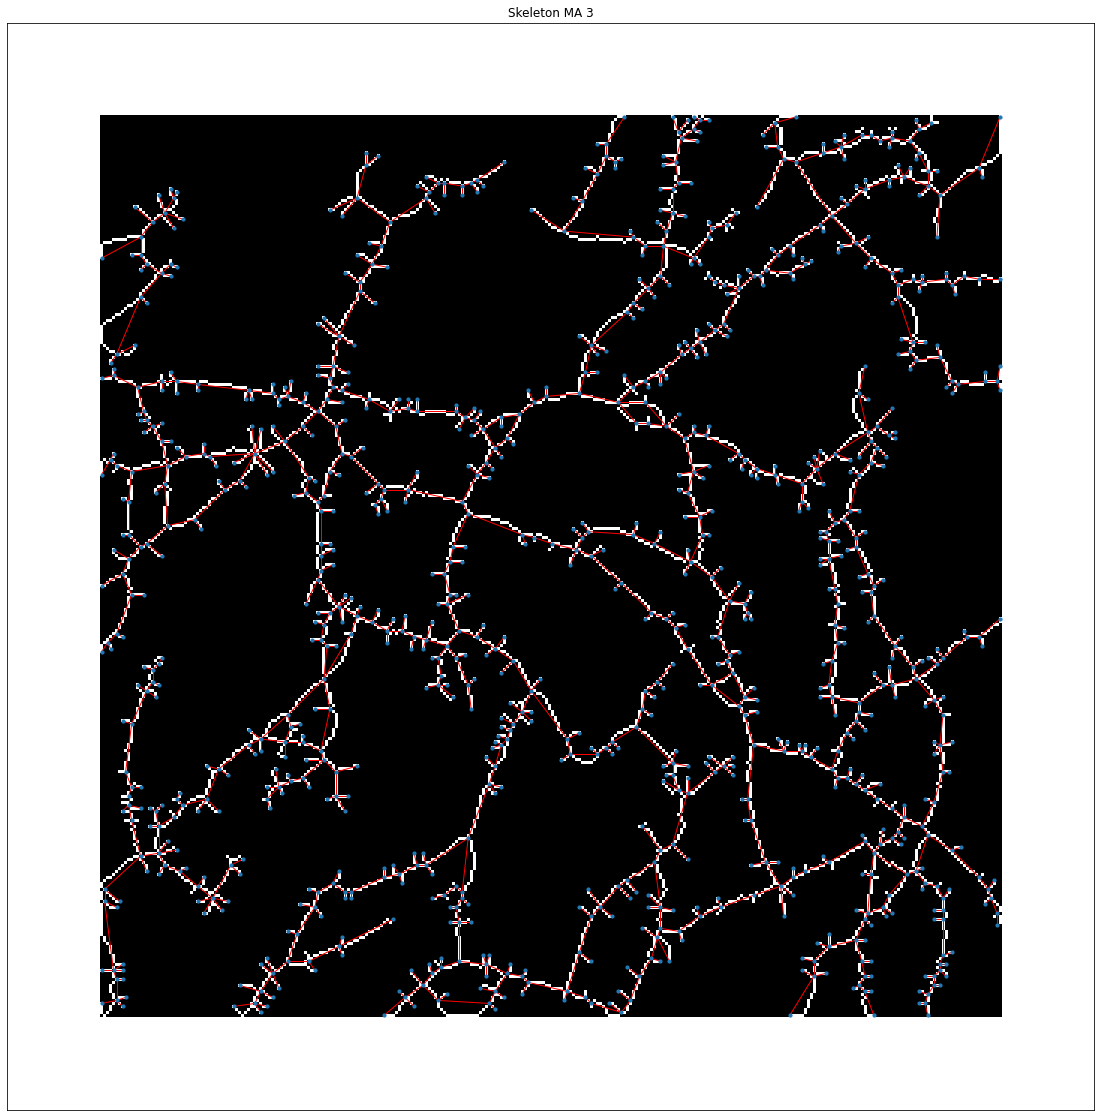

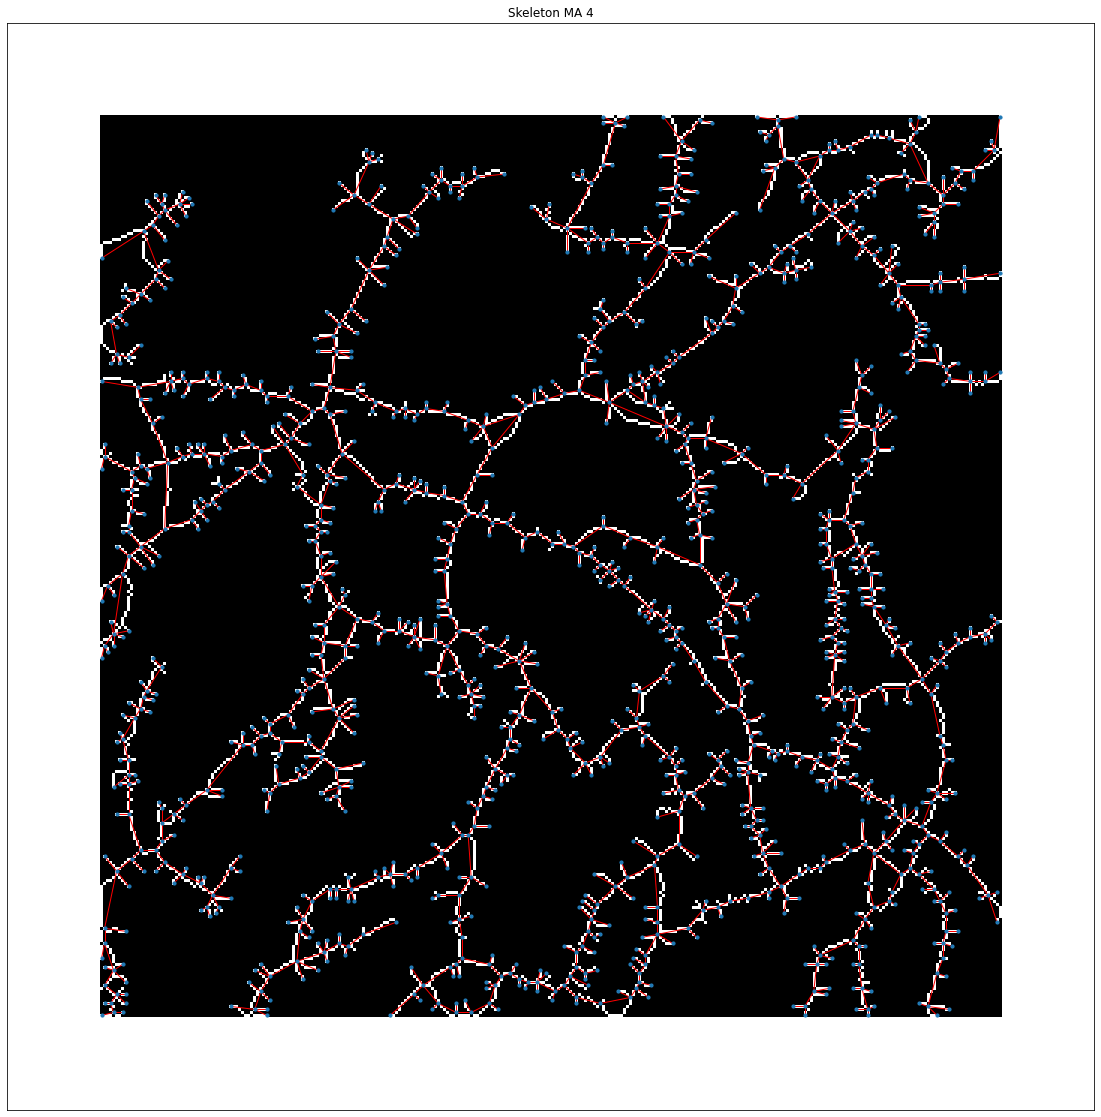

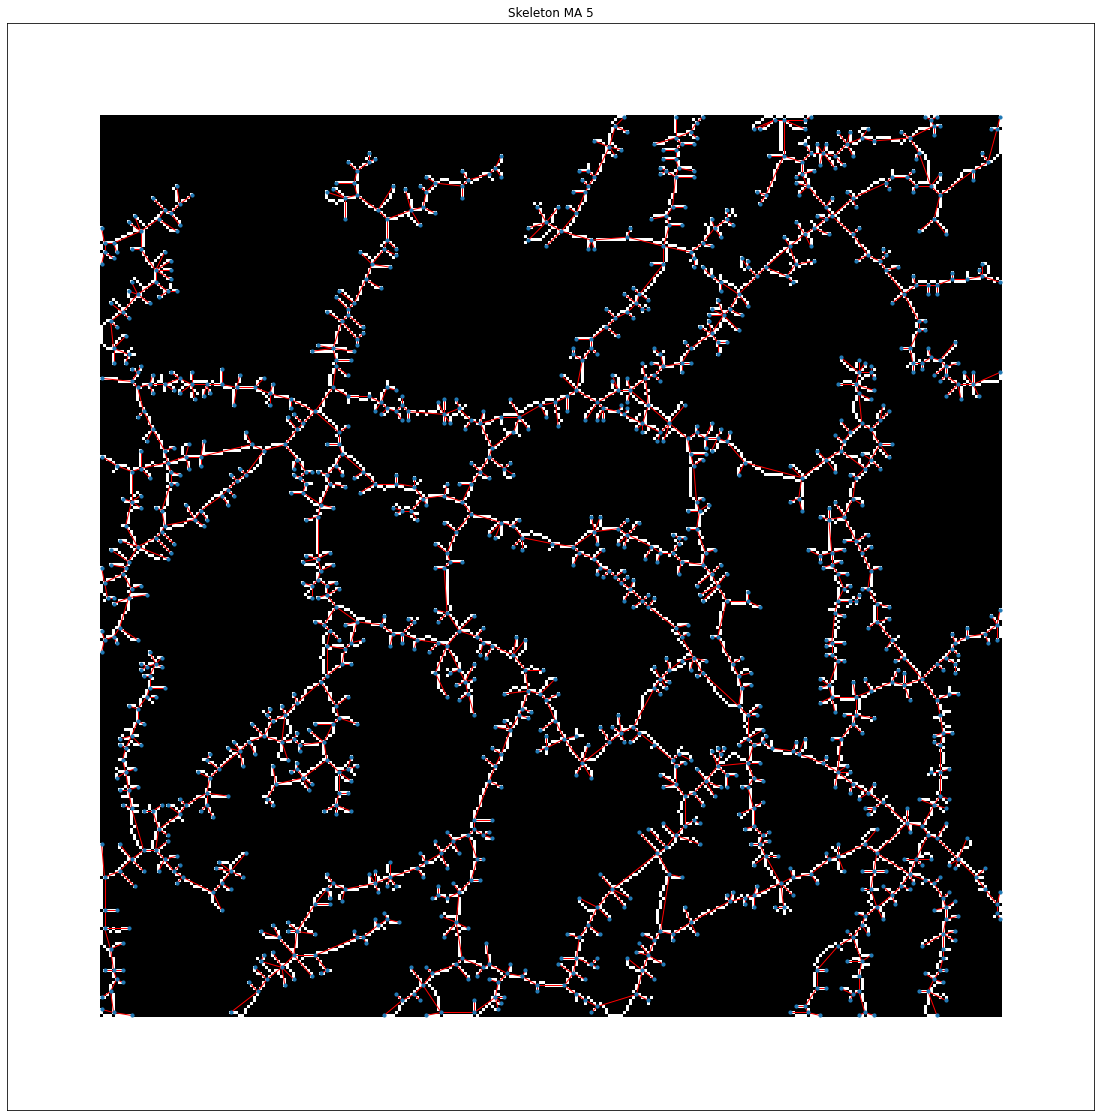

In [15]:
graph_MA = generate_plot_graph(skeleton_MA, "Skeleton MA")

Fazendo nova comparação de IOU, TPR e PPV

In [16]:
#teste = util.graph_to_img(graph_CHC[0])
teste_CHC, teste_MA, teste_skimage = [], [], []

#variaveis auxiliares das operacoes IOU, TPR e PPV
iou_CHC_graph, tpr_CHC_graph, ppv_CHC_graph = [], [], []
iou_MA_graph, tpr_MA_graph, ppv_MA_graph = [], [], []
iou_skimage_graph, tpr_skimage_graph, ppv_skimage_graph = [], [], []

In [17]:

#loop para tranformar o grafo em imagem
#isso funciona enquanto o tamanho de graph_CHC == graph_MA == graph_skimage
for i in range(len(graph_CHC)):
    # Algoritmo do Cesar
    teste = util.graph_to_img(graph_CHC[i])
    teste_CHC.append(transform_nonbinary(teste) )
    
    iou, tpr, ppv = confusion_matrix(teste_CHC[0], teste_CHC[-1])
    iou_CHC_graph.append(iou)
    tpr_CHC_graph.append(tpr)
    ppv_CHC_graph.append(ppv)
    
    #Medial Axis
    teste = util.graph_to_img(graph_MA[i])
    teste_MA.append(transform_nonbinary(teste) )
    
    iou, tpr, ppv = confusion_matrix(teste_MA[0], teste_MA[-1])
    iou_MA_graph.append(iou)
    tpr_MA_graph.append(tpr)
    ppv_MA_graph.append(ppv)
    
    
    #Skimage
    teste = util.graph_to_img(graph_skimage[i])
    teste_skimage.append(transform_nonbinary(teste) )
    
    iou, tpr, ppv = confusion_matrix(teste_skimage[0], teste_skimage[-1])
    iou_skimage_graph.append(iou)
    tpr_skimage_graph.append(tpr)
    ppv_skimage_graph.append(ppv)

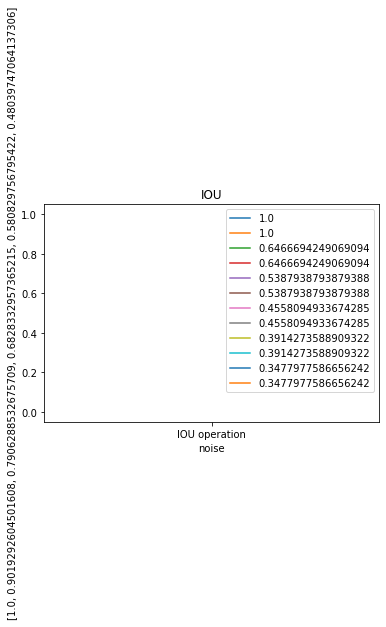

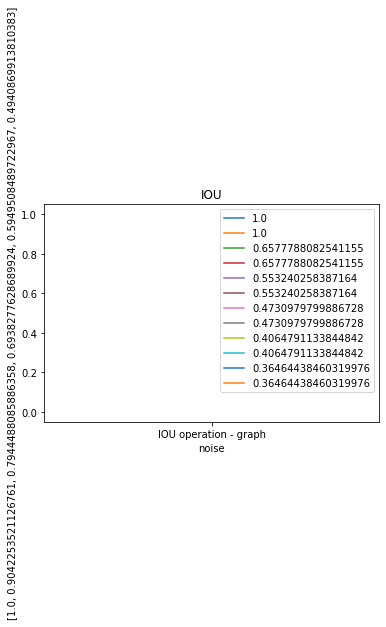

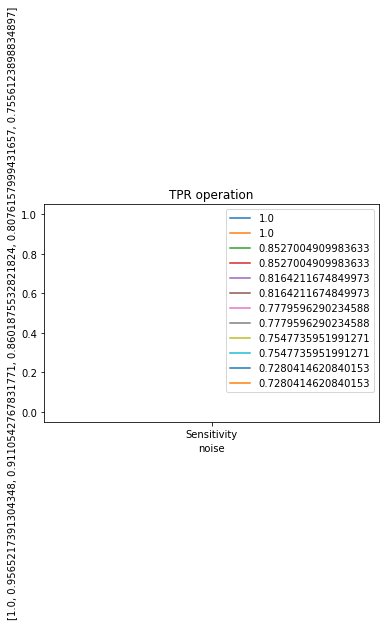

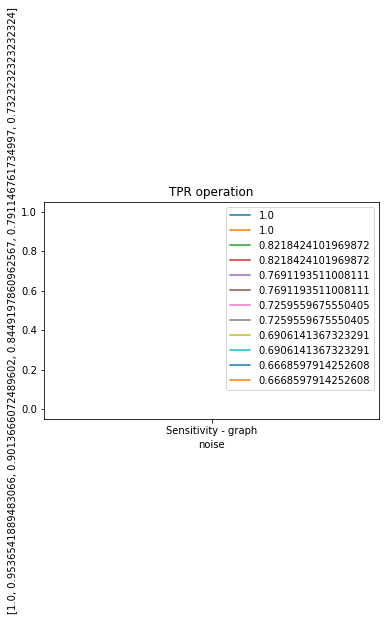

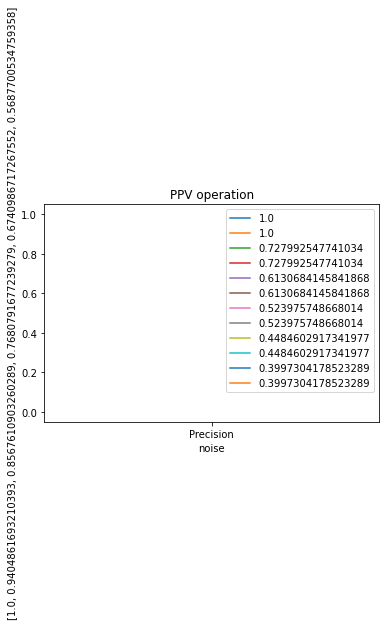

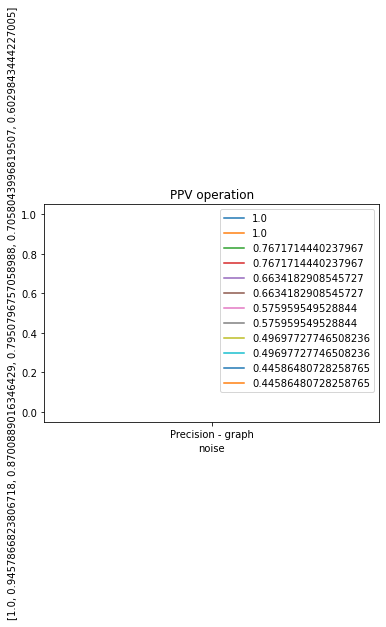

In [18]:
plot_graph(iou_skimage, iou_MA, iou_CHC, "IOU", "IOU operation", noise_aplication)
plot_graph(iou_skimage_graph, iou_MA_graph, iou_CHC_graph, "IOU", "IOU operation - graph", noise_aplication)

plot_graph(tpr_skimage, tpr_MA, tpr_CHC, "TPR operation", "Sensitivity", noise_aplication)
plot_graph(tpr_skimage_graph, tpr_MA_graph, tpr_CHC_graph, "TPR operation", "Sensitivity - graph", noise_aplication)

plot_graph(ppv_skimage, ppv_MA, ppv_CHC, "PPV operation", "Precision", noise_aplication)
plot_graph(ppv_skimage_graph, ppv_MA_graph, ppv_CHC_graph, "PPV operation", "Precision - graph", noise_aplication)

In [19]:
print("TPR CHC = ", tpr_CHC)
print("TPR CHC = ", tpr_CHC_graph)

TPR CHC =  [1.0, 0.9565217391304348, 0.9110542767831771, 0.8601875532821824, 0.8076157999431657, 0.7556123898834897]
TPR CHC =  [1.0, 0.9536541889483066, 0.9013666072489602, 0.8449197860962567, 0.791146761734997, 0.7323232323232324]


In [20]:
#função em desenvolvimento
#operação para retirar vasos espurios e nova analise de iou, tpr e ppv

new_graph_CHC, new_graph_MA, new_graph_skimage = [], [], [] 

#variavel auxiliar para comparacao de remocao de ruido
compare_CHC_graph = []


#variaveis auxiliares para calculo de tpr, iou e ppv
new_iou_CHC, new_tpr_CHC, new_ppv_CHC = [], [], []
new_iou_skimage, new_tpr_skimage, new_ppv_skimage = [], [], []
new_iou_MA, new_tpr_MA, new_ppv_MA = [], [], []

#esse for só funciona enquanto o len das listas graph_CHC == graph_MA == graph_skimage

noise_tratament = (4, 5, 6)

#analisando as 3 ultimas amostras com ruido

for i in range(0, len(graph_CHC), 1):
    #analisando o funcionamento com threshold [4:7]
    for j in noise_tratament:
        aux = util.graph_to_img(ad.adjust_graph(graph_CHC[i], j))
        new_graph_CHC.append(transform_nonbinary(aux))
        
        #iou, tpr and ppv operations
        iou, tpr, ppv = confusion_matrix(new_graph_CHC[0], new_graph_CHC[-1])
        new_iou_CHC.append(iou)
        new_tpr_CHC.append(tpr)
        new_ppv_CHC.append(ppv)

#analisando as 3 ultimas amostras com ruido
# skimage
for i in range(0, len(graph_skimage), 1):
    #analisando o funcionamento com threshold [4:7]
    for j in noise_tratament:
        aux = util.graph_to_img(ad.adjust_graph(graph_skimage[i], j))
        new_graph_skimage.append(transform_nonbinary(aux))
        
        #iou, tpr and ppv operations
        iou, tpr, ppv = confusion_matrix(new_graph_skimage[0], new_graph_skimage[-1])
        new_iou_skimage.append(iou)
        new_tpr_skimage.append(tpr)
        new_ppv_skimage.append(ppv)

#analisando as 3 ultimas amostras com ruido
#Medial axis
for i in range(0, len(graph_MA), 1):
    #analisando o funcionamento com threshold [4:7]
    for j in noise_tratament:
        aux = util.graph_to_img(ad.adjust_graph(graph_MA[i], j))
        new_graph_MA.append(transform_nonbinary(aux))
        
        #iou, tpr and ppv operations
        iou, tpr, ppv = confusion_matrix(new_graph_MA[0], new_graph_MA[-1])
        new_iou_MA.append(iou)
        new_tpr_MA.append(tpr)
        new_ppv_MA.append(ppv)
        
print(len(new_graph_CHC))
print(len(new_graph_skimage))
print(len(new_graph_MA))

18
18
18


In [21]:
#print(len(new_iou_CHC), len(new_tpr_CHC), len(new_ppv_CHC))
#print(len(new_iou_skimage), len(new_tpr_skimage), len(new_ppv_skimage))
#print(len(new_iou_MA), len(new_tpr_MA), len(new_ppv_MA))
print(new_iou_CHC, "\n")
print(iou_CHC)

[1.0, 0.9934190846545019, 0.989237668161435, 0.9111747851002865, 0.9094296359988535, 0.9054441260744985, 0.8163596966413867, 0.8172189027702336, 0.8189490879390144, 0.7235793263049627, 0.7240845796802475, 0.7237726098191214, 0.6247609942638623, 0.6316425120772947, 0.638671875, 0.5324360105913504, 0.5394265232974911, 0.5509078372787864] 

[1.0, 0.9019292604501608, 0.7906288532675709, 0.6828332957365215, 0.580829756795422, 0.48039747064137306]


In [22]:
#função em desenvolvimento
#o problema é que não esta sendo plotado por conta de conflito de tamanho entre as operacoes
"""
print(noise_tratament)
print(len(noise_aplication))
print(len(iou_skimage))
"""
#plot_graph(new_iou_skimage, new_iou_MA, new_iou_CHC, "IOU", "IOU operation", noise_tratament)
#plot_graph(new_tpr_skimage, new_tpr_MA, new_tpr_CHC, "TPR operation", "Sensitivity", noise_tratament)
#plot_graph(new_ppv_skimage, new_ppv_MA, new_ppv_CHC, "PPV operation", "Precision", noise_tratament)

'\nprint(noise_tratament)\nprint(len(noise_aplication))\nprint(len(iou_skimage))\n'

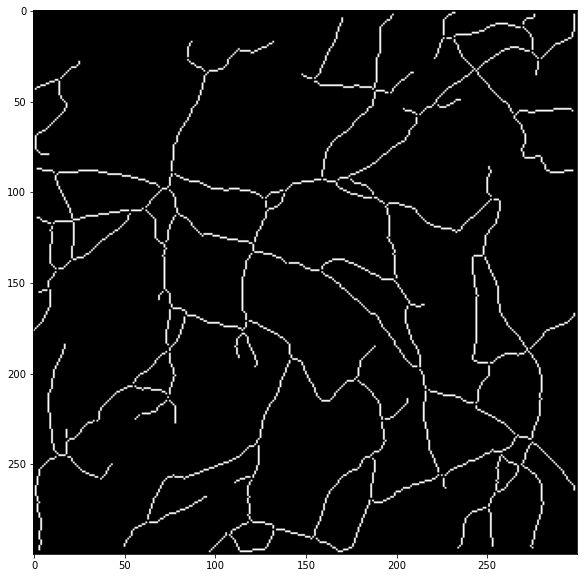

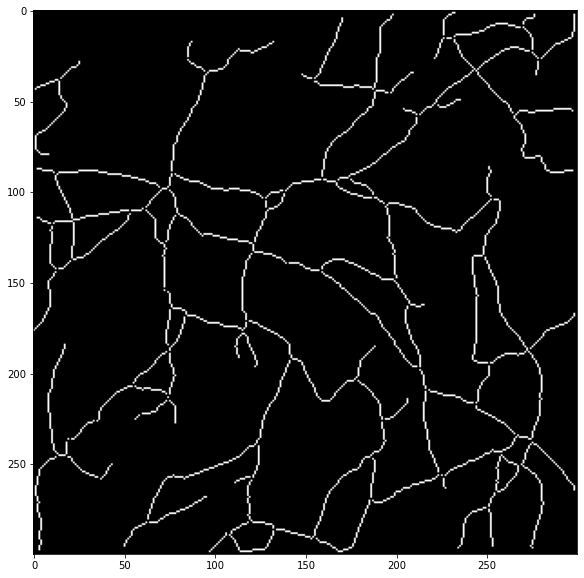

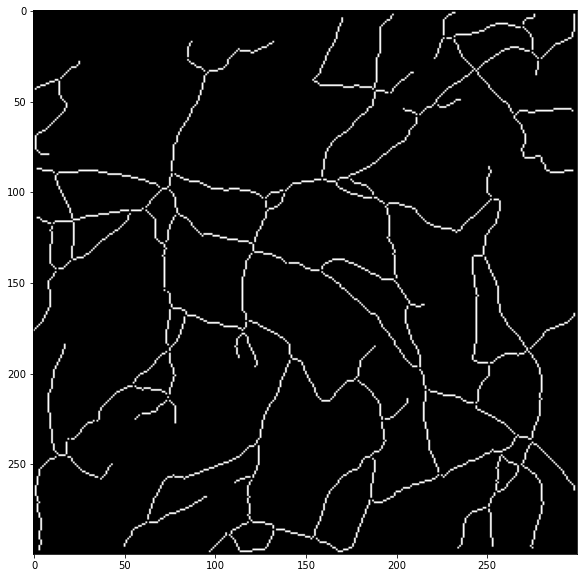

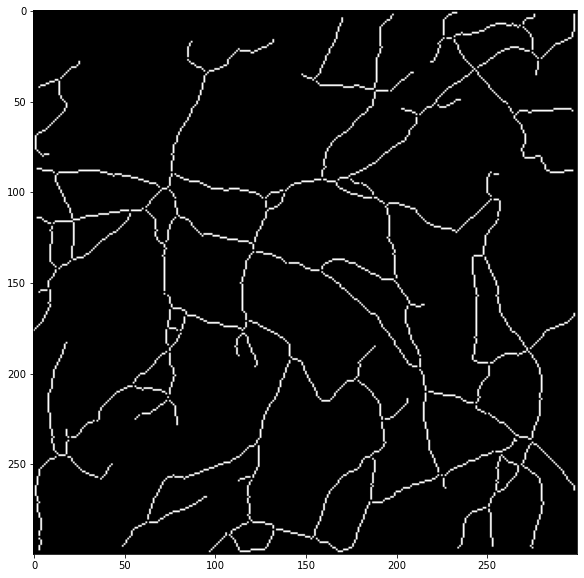

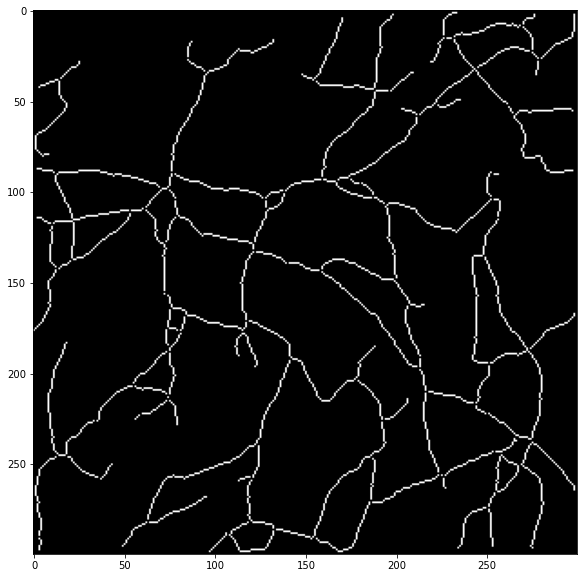

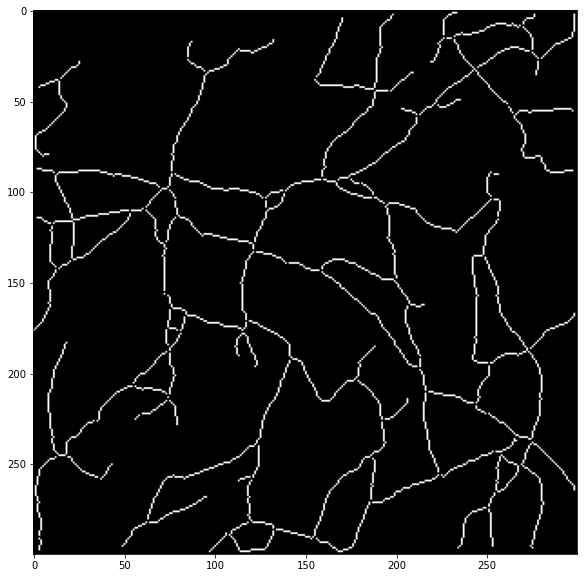

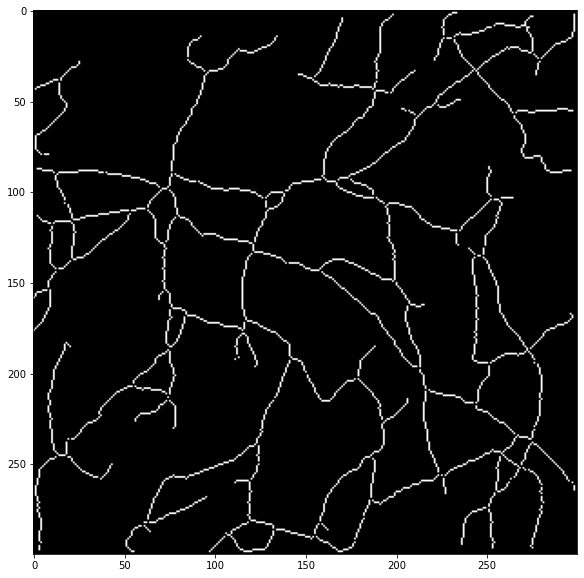

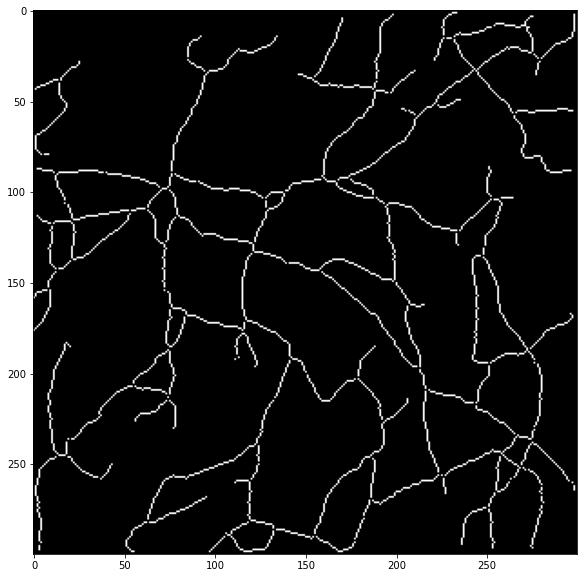

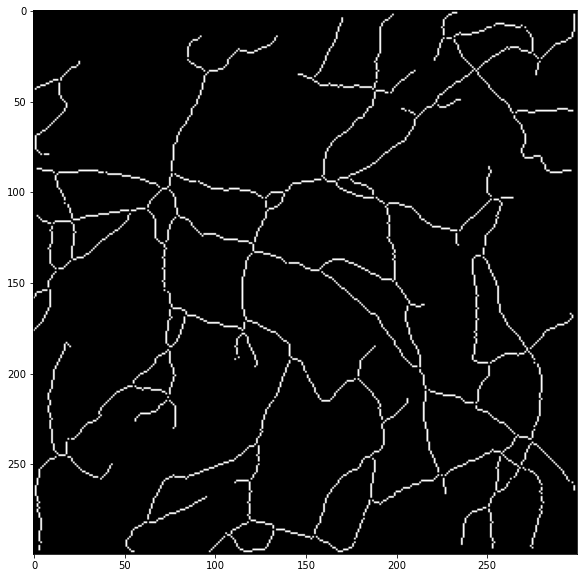

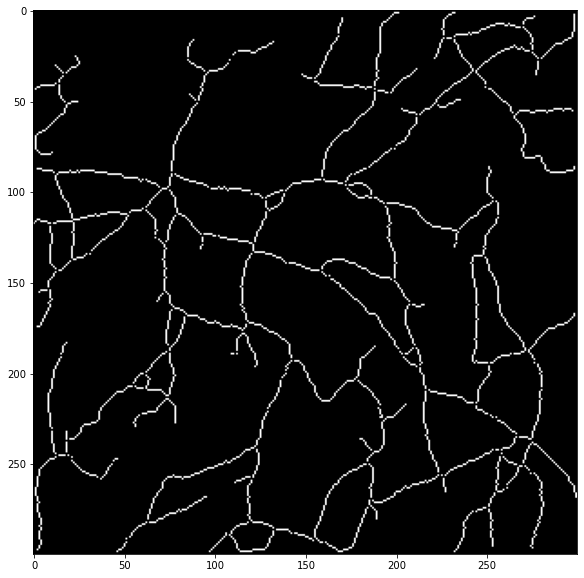

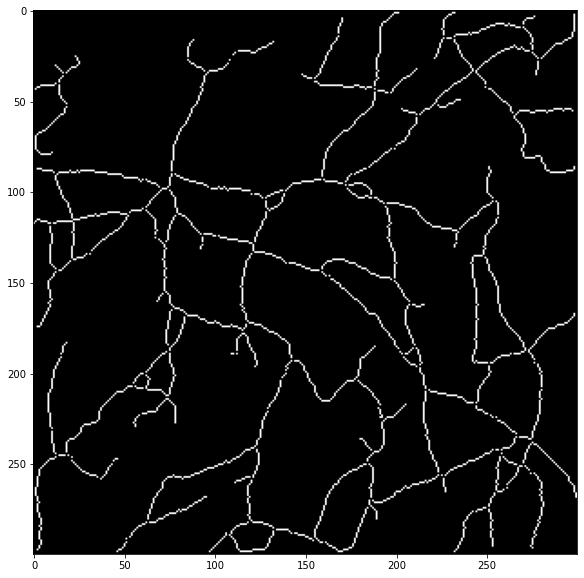

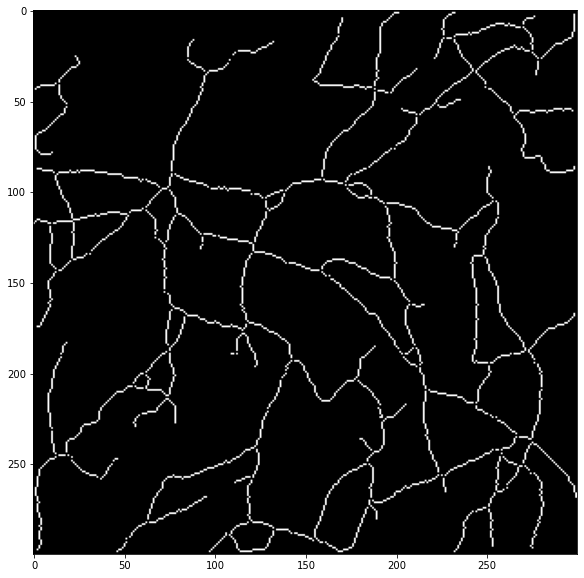

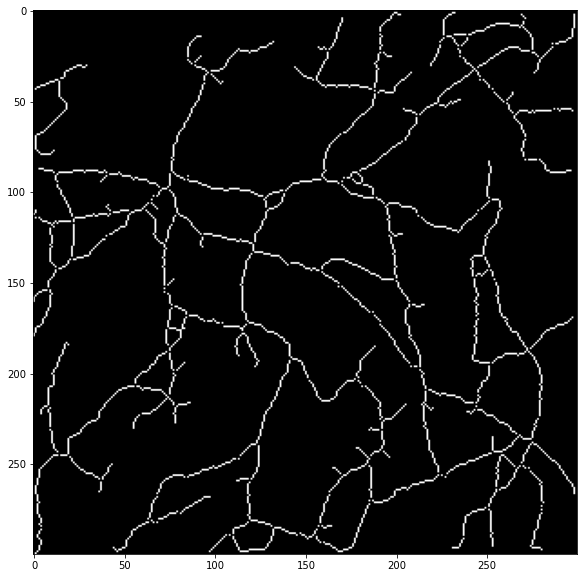

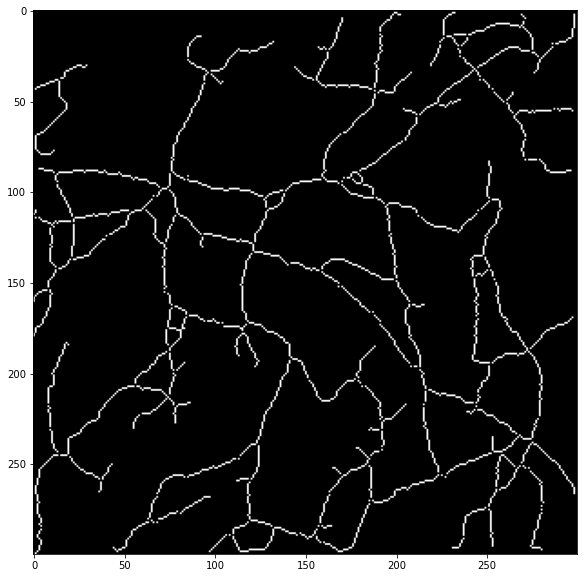

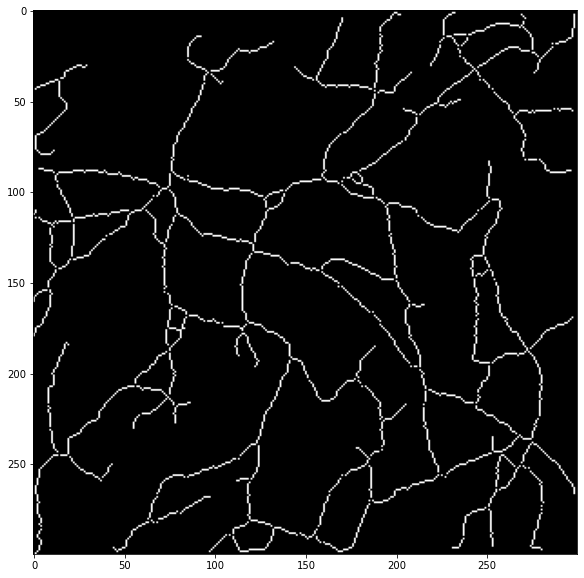

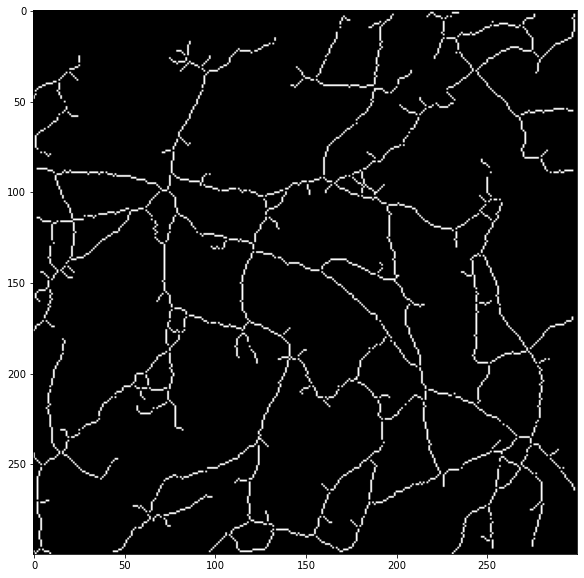

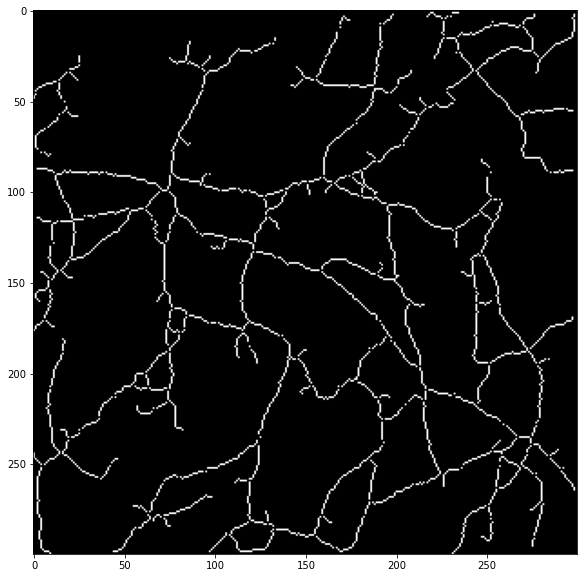

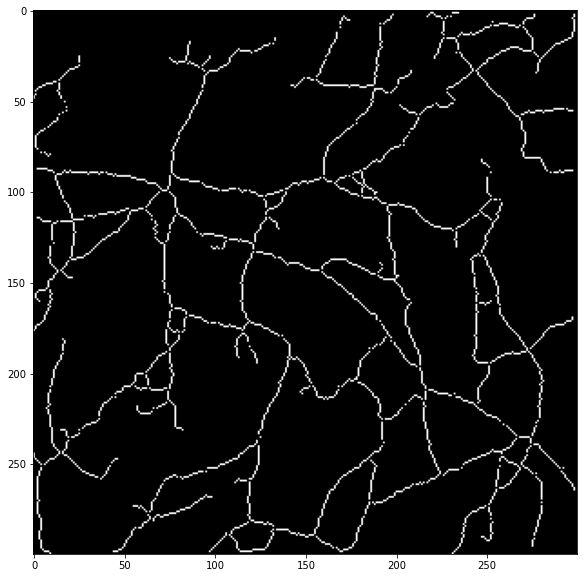

In [23]:
_ = []
for i in range(len(new_graph_CHC)):
    _.append(transform_rgb_to_gray(new_graph_CHC[i]))
mostra_img(_)


In [24]:
#green represent the graph and red represent the skeleton
#for each 3 image, show a noise value
mostra_img(compare_CHC_graph)

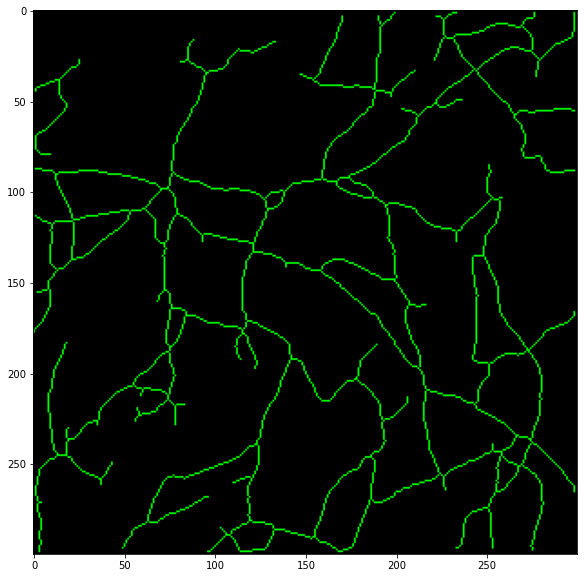

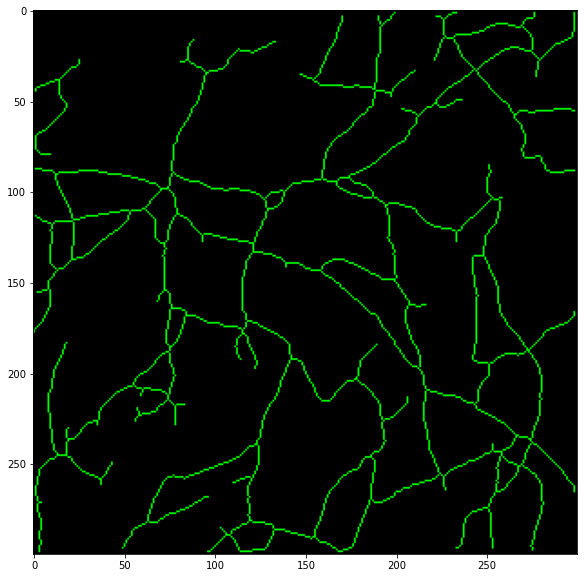

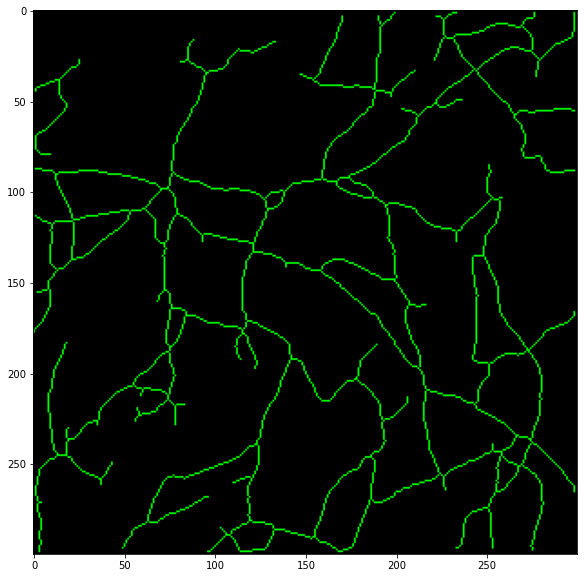

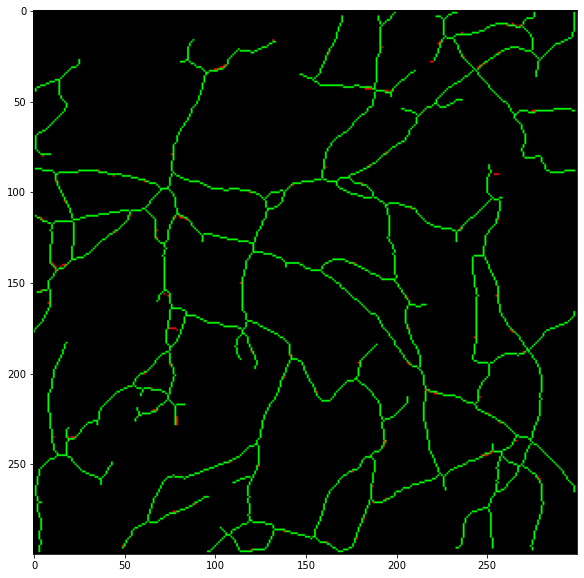

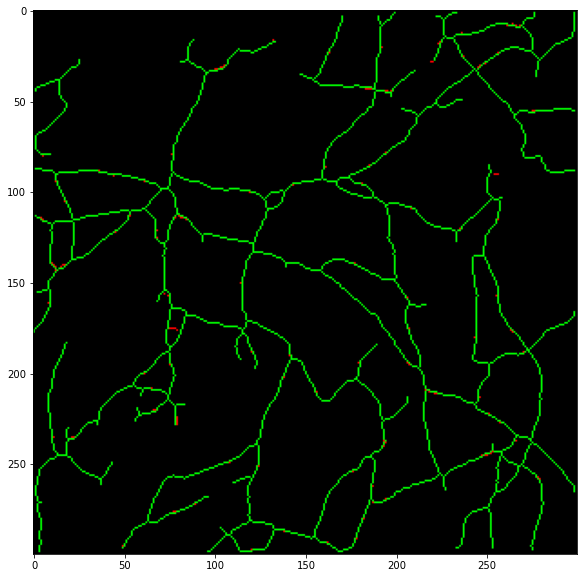

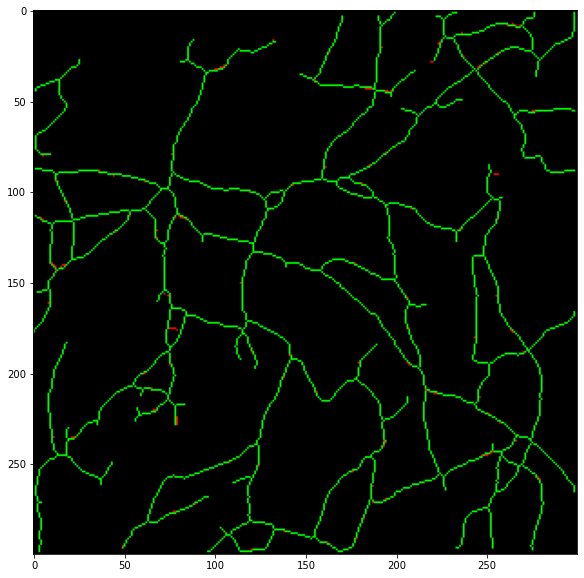

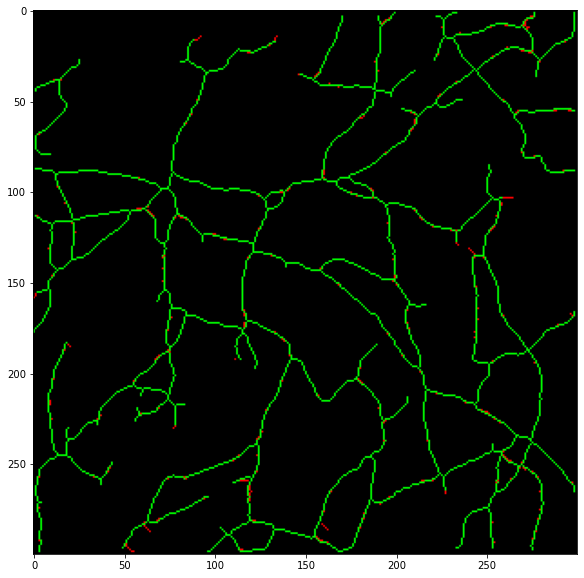

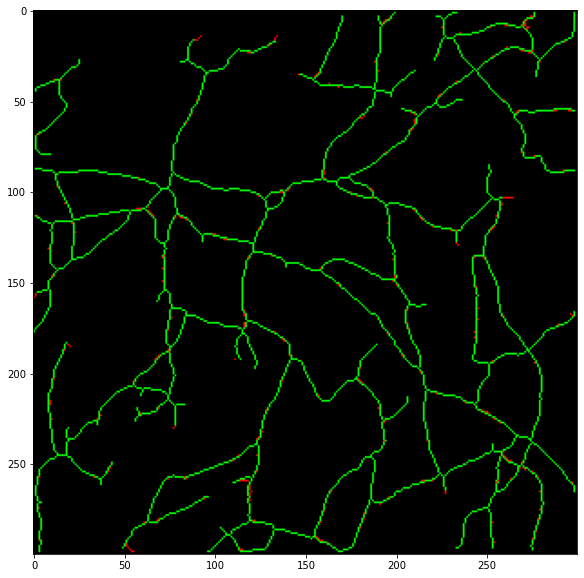

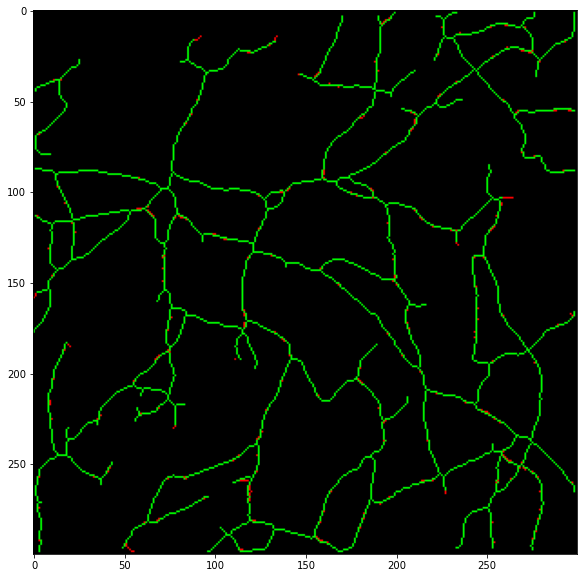

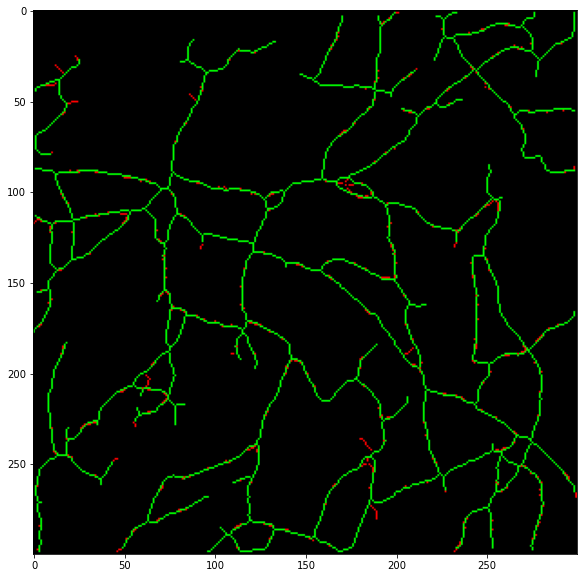

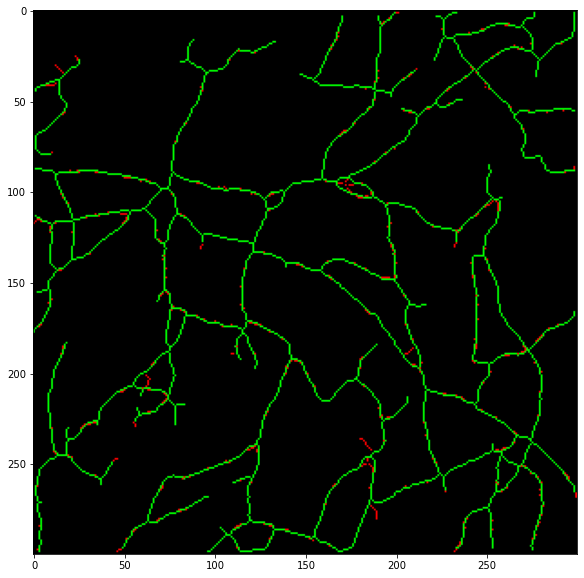

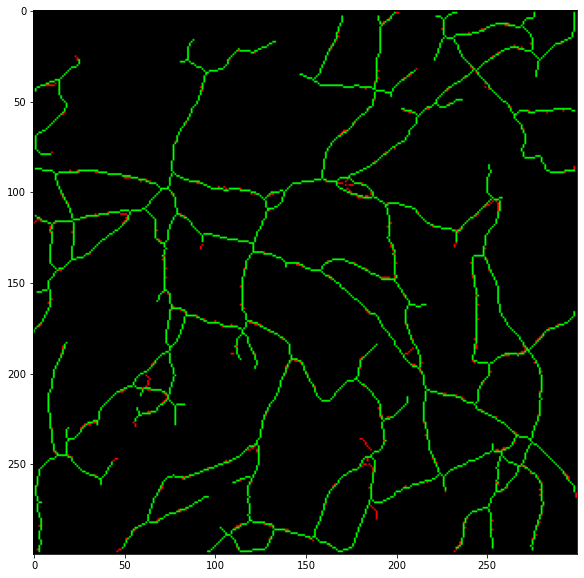

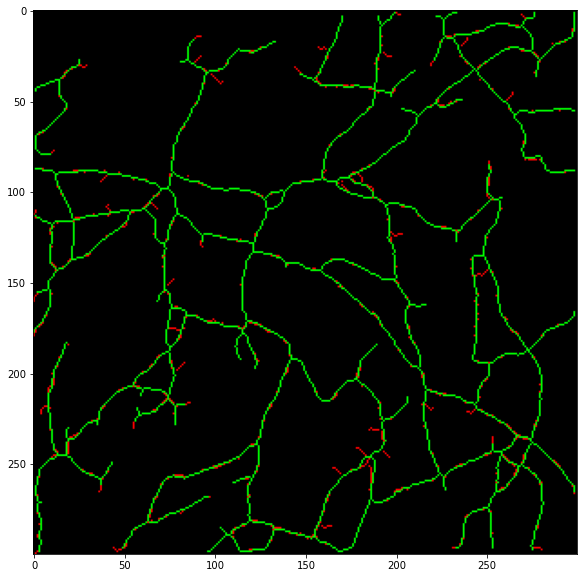

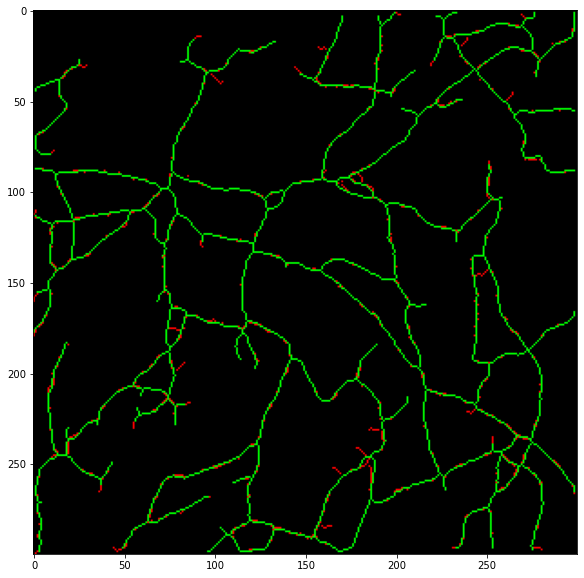

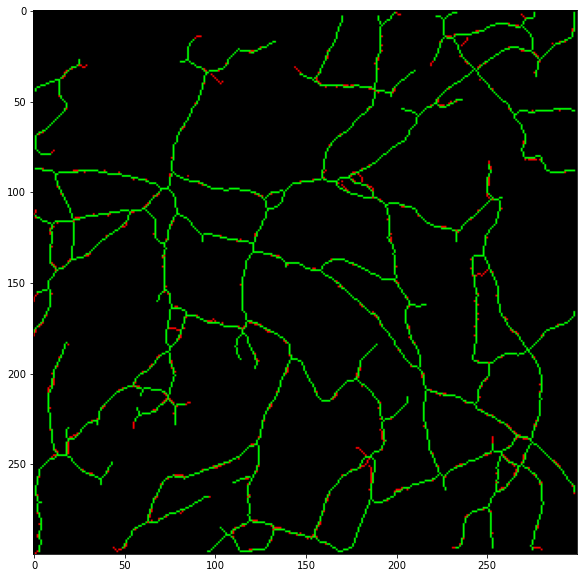

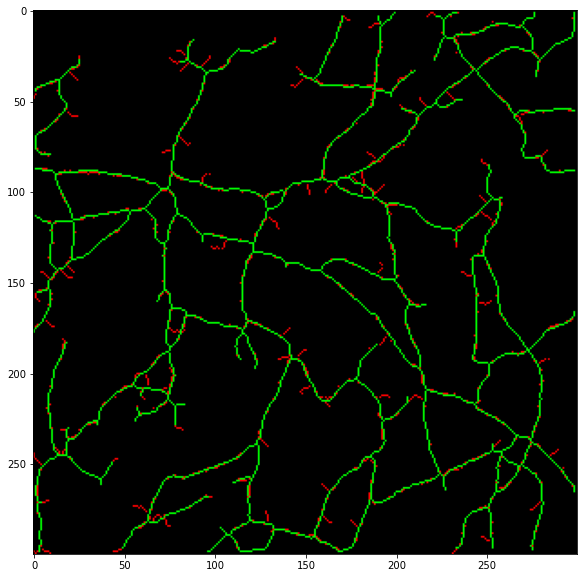

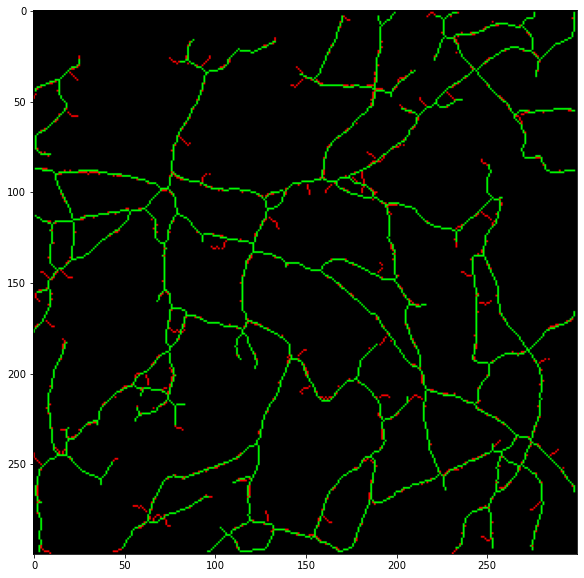

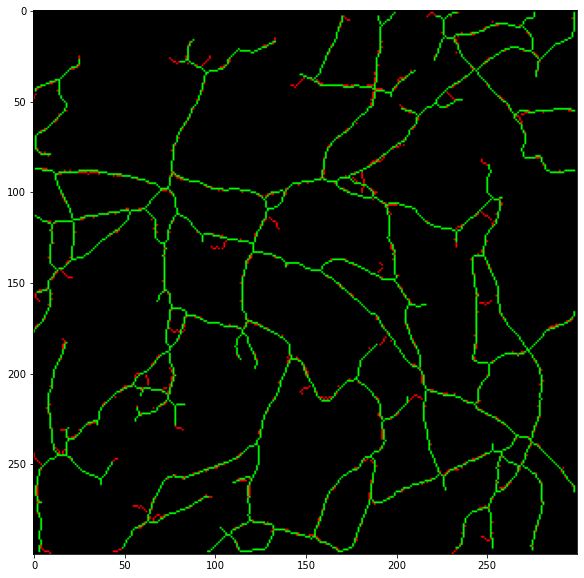

In [25]:
compare_CHC_graph_original = []
#red represent the graph and green represent the skeleton without noise
#for each 3 image, show a noise value
for i in range(len(new_graph_CHC)):
    compare_CHC_graph_original.append(merge_image(new_graph_CHC[i], skeleton_CHC[0]))
mostra_img(compare_CHC_graph_original)